In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2022-02-26 15:27:50 +01:00)


In [2]:
%matplotlib inline

time: 484 ms (started: 2022-02-26 15:27:52 +01:00)


In [3]:
import os
import glob
import json
from tqdm import tqdm
import pandas as pd


from PIL import Image
import imagesize


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
from IPython.display import display

time: 891 ms (started: 2022-02-26 15:27:55 +01:00)


In [4]:
root_dir ='C:/Users/sioha/Projet_mushroom/'
images_dir = root_dir + 'IMAGES/'
json_dir = root_dir + 'JSON/'
images_dir

'C:/Users/sioha/Projet_mushroom/IMAGES/'

time: 0 ns (started: 2022-02-26 15:27:58 +01:00)


In [6]:
#rebuild_database = False
year_dirs = [f.path for f in os.scandir(images_dir) if f.is_dir()]
display(year_dirs)

['C:/Users/sioha/Projet_mushroom/IMAGES/2006',
 'C:/Users/sioha/Projet_mushroom/IMAGES/2007',
 'C:/Users/sioha/Projet_mushroom/IMAGES/2008',
 'C:/Users/sioha/Projet_mushroom/IMAGES/2009',
 'C:/Users/sioha/Projet_mushroom/IMAGES/2010',
 'C:/Users/sioha/Projet_mushroom/IMAGES/2011',
 'C:/Users/sioha/Projet_mushroom/IMAGES/2012',
 'C:/Users/sioha/Projet_mushroom/IMAGES/2013',
 'C:/Users/sioha/Projet_mushroom/IMAGES/2014',
 'C:/Users/sioha/Projet_mushroom/IMAGES/2015',
 'C:/Users/sioha/Projet_mushroom/IMAGES/2016']

time: 0 ns (started: 2022-01-14 11:45:41 +01:00)


In [6]:
rebuild_database=False

time: 0 ns (started: 2022-01-07 10:04:59 +01:00)


In [7]:
if rebuild_database:
  # list all year directories
  year_dirs = [f.path for f in os.scandir(images_dir) if f.is_dir()]
  # loop to get a csv per year 
  for year_dir in year_dirs:
    year = year_dir[-4:]
    csv_path = root_dir + year + '.csv'
    img_dict = {}
    for path, subdirs, files in tqdm(os.walk(year_dir)):
          for name in files:
              file_path = os.path.join(path, name) # get path
              resolution= (imagesize.get(file_path)) # get res
              img_dict[name]= [file_path,resolution] #append to dict
          # create df and save to not redo each time
          img_lst_df = pd.DataFrame.from_dict(img_dict, orient='index',columns=["file_path","resolution"])
          img_lst_df['file_year'] = year
          img_lst_df.to_csv(csv_path)

683it [00:05, 118.50it/s]
1139it [00:19, 59.41it/s]
2511it [01:12, 34.60it/s]
3392it [02:25, 23.34it/s]
3869it [04:08, 15.58it/s]
4436it [04:47, 15.46it/s]
5829it [09:47,  9.93it/s]
5137it [07:15, 11.79it/s]
5428it [07:15, 12.47it/s]
4915it [05:48, 14.10it/s]
5062it [07:06, 11.88it/s]

time: 50min 10s (started: 2022-01-07 10:05:32 +01:00)


In [8]:
csv_files = [root_dir + str(year) + '.csv' for year in range(2006,2017) if os.path.exists(root_dir + str(year) + '.csv')]
display(csv_files)

['C:/Users/sioha/Projet_mushroom/2006.csv',
 'C:/Users/sioha/Projet_mushroom/2007.csv',
 'C:/Users/sioha/Projet_mushroom/2008.csv',
 'C:/Users/sioha/Projet_mushroom/2009.csv',
 'C:/Users/sioha/Projet_mushroom/2010.csv',
 'C:/Users/sioha/Projet_mushroom/2011.csv',
 'C:/Users/sioha/Projet_mushroom/2012.csv',
 'C:/Users/sioha/Projet_mushroom/2013.csv',
 'C:/Users/sioha/Projet_mushroom/2014.csv',
 'C:/Users/sioha/Projet_mushroom/2015.csv',
 'C:/Users/sioha/Projet_mushroom/2016.csv']

time: 0 ns (started: 2022-01-07 10:57:23 +01:00)


In [9]:
img_lst_df

,file_path,resolution,file_year
591138.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Abo...,"(320, 198)",2016
594417.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Abo...,"(320, 180)",2016
622735.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Abo...,"(255, 320)",2016
623424.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Abo...,"(320, 240)",2016
624140.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Abo...,"(240, 320)",2016
...,...,...,...
625253.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Xyl...,"(320, 229)",2016
630748.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Xyl...,"(320, 276)",2016
662083.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Xyl...,"(320, 299)",2016
678141.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Xyl...,"(214, 320)",2016


time: 31 ms (started: 2022-01-07 11:00:02 +01:00)


In [10]:
if rebuild_database:
  # load and concat csv per year 
  csv_files = [root_dir + str(year) + '.csv' for year in range(2006,2017) if os.path.exists(root_dir + str(year) + '.csv')]
  dfs_ = []
  for filename in csv_files:
      df = pd.read_csv(filename, index_col=None, header=0)
      dfs_.append(df)
  img_lst_df = pd.concat(dfs_, axis=0, ignore_index=True)
  # extract iamge_id and format 
  img_lst_df.rename(columns={img_lst_df.columns[0]: "file_name"}, inplace=True)
  img_lst_df[['image_id', 'format']] = img_lst_df['file_name'].str.split('.', 1, expand=True)

time: 812 ms (started: 2022-01-07 11:01:11 +01:00)


In [13]:
display(img_lst_df)

,file_name,file_path,resolution,file_year,image_id,format
0,1208.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(243, 320)",2006,1208,jpg
1,1604.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 164)",2006,1604,jpg
2,1608.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 286)",2006,1608,jpg
3,29.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(240, 320)",2006,29,jpg
4,680.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(240, 320)",2006,680,jpg
...,...,...,...,...,...,...
214914,625253.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Xyl...,"(320, 229)",2016,625253,jpg
214915,630748.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Xyl...,"(320, 276)",2016,630748,jpg
214916,662083.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Xyl...,"(320, 299)",2016,662083,jpg
214917,678141.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Xyl...,"(214, 320)",2016,678141,jpg


time: 16 ms (started: 2022-01-07 11:13:19 +01:00)


In [5]:
json_pattern = os.path.join(json_dir, '*.json')
json_pattern

'C:/Users/sioha/Projet_mushroom/JSON/*.json'

time: 0 ns (started: 2022-02-24 14:30:07 +01:00)


In [6]:
file_list = glob.glob(json_pattern)
file_list

['C:/Users/sioha/Projet_mushroom/JSON\\observations_0.json',
 'C:/Users/sioha/Projet_mushroom/JSON\\observations_1.json',
 'C:/Users/sioha/Projet_mushroom/JSON\\observations_10.json',
 'C:/Users/sioha/Projet_mushroom/JSON\\observations_11.json',
 'C:/Users/sioha/Projet_mushroom/JSON\\observations_2.json',
 'C:/Users/sioha/Projet_mushroom/JSON\\observations_3.json',
 'C:/Users/sioha/Projet_mushroom/JSON\\observations_4.json',
 'C:/Users/sioha/Projet_mushroom/JSON\\observations_5.json',
 'C:/Users/sioha/Projet_mushroom/JSON\\observations_6.json',
 'C:/Users/sioha/Projet_mushroom/JSON\\observations_7.json',
 'C:/Users/sioha/Projet_mushroom/JSON\\observations_8.json',
 'C:/Users/sioha/Projet_mushroom/JSON\\observations_9.json']

time: 0 ns (started: 2022-02-24 14:30:15 +01:00)


In [7]:
rebuild_database=True
if rebuild_database:
  json_pattern = os.path.join(json_dir, '*.json')
  file_list = glob.glob(json_pattern)

  json_dfs = []
  for file in file_list:
      with open(file) as f:
          json_data = pd.json_normalize(json.loads(f.read()))
          json_data['json_file'] = file.rsplit("/", 1)[-1]
      json_dfs.append(json_data)
  json_df = pd.concat(json_dfs)

time: 52.5 s (started: 2022-02-24 14:30:38 +01:00)


In [8]:
json_df

,observation,label,image_id,image_url,user,date,thumbnail,location,gbif_info.kingdom,gbif_info.family,...,gbif_info.canonicalName,gbif_info.phylumKey,gbif_info.class,gbif_info.synonym,gbif_info.scientificName,gbif_info.genus,gbif_info.order,gbif_info.note,gbif_info,json_file
0,1,Xylaria polymorpha,1,http://mushroomobserver.org/images/320/1,1,2006-05-21 07:17:05,1,214,Fungi,Xylariaceae,...,Xylaria polymorpha,95.0,Sordariomycetes,False,"Xylaria polymorpha (Pers.) Grev., 1824",Xylaria,Xylariales,NaN,NaN,JSON\observations_0.json
1,2,Xylaria magnoliae,2,http://mushroomobserver.org/images/320/2,1,2006-05-21 07:17:06,1,53,Fungi,Xylariaceae,...,Xylaria magnoliae,95.0,Sordariomycetes,False,"Xylaria magnoliae J.D. Rogers, 1979",Xylaria,Xylariales,NaN,NaN,JSON\observations_0.json
2,3,Xylaria hypoxylon,3,http://mushroomobserver.org/images/320/3,1,2006-05-21 07:17:08,1,60,Fungi,Xylariaceae,...,Xylaria hypoxylon,95.0,Sordariomycetes,False,"Xylaria hypoxylon (L.) Grev., 1824",Xylaria,Xylariales,NaN,NaN,JSON\observations_0.json
3,4,Xylaria hypoxylon,4,http://mushroomobserver.org/images/320/4,1,2006-05-21 07:17:10,1,5,Fungi,Xylariaceae,...,Xylaria hypoxylon,95.0,Sordariomycetes,False,"Xylaria hypoxylon (L.) Grev., 1824",Xylaria,Xylariales,NaN,NaN,JSON\observations_0.json
4,5,Xeromphalina,5,http://mushroomobserver.org/images/320/5,1,2006-05-21 07:17:12,1,36,Fungi,Mycenaceae,...,Xeromphalina,34.0,Agaricomycetes,False,Xeromphalina Kühner & Maire,Xeromphalina,Agaricales,NaN,NaN,JSON\observations_0.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68563,256407,Fungi,673194,http://mushroomobserver.org/images/320/673194,7377,2016-10-12 16:02:28,0,14211.0,Fungi,NaN,...,Fungi,NaN,NaN,False,Fungi,NaN,NaN,NaN,NaN,JSON\observations_9.json
68564,256407,Fungi,673195,http://mushroomobserver.org/images/320/673195,7377,2016-10-12 16:02:28,0,14211.0,Fungi,NaN,...,Fungi,NaN,NaN,False,Fungi,NaN,NaN,NaN,NaN,JSON\observations_9.json
68565,256408,Fungi,673196,http://mushroomobserver.org/images/320/673196,7377,2016-10-12 16:04:41,1,14211.0,Fungi,NaN,...,Fungi,NaN,NaN,False,Fungi,NaN,NaN,NaN,NaN,JSON\observations_9.json
68566,256408,Fungi,673197,http://mushroomobserver.org/images/320/673197,7377,2016-10-12 16:04:41,0,14211.0,Fungi,NaN,...,Fungi,NaN,NaN,False,Fungi,NaN,NaN,NaN,NaN,JSON\observations_9.json


time: 1.64 s (started: 2022-02-24 14:31:37 +01:00)


In [9]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650743 entries, 0 to 68567
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   observation               650743 non-null  object 
 1   label                     650743 non-null  object 
 2   image_id                  650743 non-null  object 
 3   image_url                 650743 non-null  object 
 4   user                      650743 non-null  object 
 5   date                      650743 non-null  object 
 6   thumbnail                 650743 non-null  int64  
 7   location                  650716 non-null  object 
 8   gbif_info.kingdom         616677 non-null  object 
 9   gbif_info.family          587873 non-null  object 
 10  gbif_info.speciesKey      413033 non-null  float64
 11  gbif_info.rank            616721 non-null  object 
 12  gbif_info.phylum          612972 non-null  object 
 13  gbif_info.orderKey        608964 non-null  fl

In [18]:
if rebuild_database:
  json_df.to_csv(path_or_buf=root_dir + 'json_data.csv',index=False)

time: 10.7 s (started: 2022-01-07 11:19:30 +01:00)


In [19]:
# load csv 
if rebuild_database:
  json_lst_df = pd.read_csv(root_dir + 'json_data.csv')
  json_lst_df

time: 3.94 s (started: 2022-01-07 11:20:13 +01:00)


C:\Users\sioha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,4,7,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
json_lst_df

,observation,label,image_id,image_url,user,date,thumbnail,location,gbif_info.kingdom,gbif_info.family,...,gbif_info.canonicalName,gbif_info.phylumKey,gbif_info.class,gbif_info.synonym,gbif_info.scientificName,gbif_info.genus,gbif_info.order,gbif_info.note,gbif_info,json_file
0,1,Xylaria polymorpha,1,http://mushroomobserver.org/images/320/1,1,2006-05-21 07:17:05,1,214,Fungi,Xylariaceae,...,Xylaria polymorpha,95.0,Sordariomycetes,False,"Xylaria polymorpha (Pers.) Grev., 1824",Xylaria,Xylariales,NaN,NaN,JSON\observations_0.json
1,2,Xylaria magnoliae,2,http://mushroomobserver.org/images/320/2,1,2006-05-21 07:17:06,1,53,Fungi,Xylariaceae,...,Xylaria magnoliae,95.0,Sordariomycetes,False,"Xylaria magnoliae J.D. Rogers, 1979",Xylaria,Xylariales,NaN,NaN,JSON\observations_0.json
2,3,Xylaria hypoxylon,3,http://mushroomobserver.org/images/320/3,1,2006-05-21 07:17:08,1,60,Fungi,Xylariaceae,...,Xylaria hypoxylon,95.0,Sordariomycetes,False,"Xylaria hypoxylon (L.) Grev., 1824",Xylaria,Xylariales,NaN,NaN,JSON\observations_0.json
3,4,Xylaria hypoxylon,4,http://mushroomobserver.org/images/320/4,1,2006-05-21 07:17:10,1,5,Fungi,Xylariaceae,...,Xylaria hypoxylon,95.0,Sordariomycetes,False,"Xylaria hypoxylon (L.) Grev., 1824",Xylaria,Xylariales,NaN,NaN,JSON\observations_0.json
4,5,Xeromphalina,5,http://mushroomobserver.org/images/320/5,1,2006-05-21 07:17:12,1,36,Fungi,Mycenaceae,...,Xeromphalina,34.0,Agaricomycetes,False,Xeromphalina Kühner & Maire,Xeromphalina,Agaricales,NaN,NaN,JSON\observations_0.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650738,256407,Fungi,673194,http://mushroomobserver.org/images/320/673194,7377,2016-10-12 16:02:28,0,14211.0,Fungi,NaN,...,Fungi,NaN,NaN,False,Fungi,NaN,NaN,NaN,NaN,JSON\observations_9.json
650739,256407,Fungi,673195,http://mushroomobserver.org/images/320/673195,7377,2016-10-12 16:02:28,0,14211.0,Fungi,NaN,...,Fungi,NaN,NaN,False,Fungi,NaN,NaN,NaN,NaN,JSON\observations_9.json
650740,256408,Fungi,673196,http://mushroomobserver.org/images/320/673196,7377,2016-10-12 16:04:41,1,14211.0,Fungi,NaN,...,Fungi,NaN,NaN,False,Fungi,NaN,NaN,NaN,NaN,JSON\observations_9.json
650741,256408,Fungi,673197,http://mushroomobserver.org/images/320/673197,7377,2016-10-12 16:04:41,0,14211.0,Fungi,NaN,...,Fungi,NaN,NaN,False,Fungi,NaN,NaN,NaN,NaN,JSON\observations_9.json


time: 719 ms (started: 2022-01-07 11:21:10 +01:00)


In [21]:
## join to get only file present in image dir and json files 
if rebuild_database:
  json_lst_df['image_id'] = json_lst_df['image_id'].astype(str)
  df = img_lst_df.merge(json_lst_df, how='inner', on='image_id')
  df.head()

time: 3.16 s (started: 2022-01-07 11:22:30 +01:00)


In [23]:
df.head()

,file_name,file_path,resolution,file_year,image_id,format,observation,label,image_url,user,...,gbif_info.canonicalName,gbif_info.phylumKey,gbif_info.class,gbif_info.synonym,gbif_info.scientificName,gbif_info.genus,gbif_info.order,gbif_info.note,gbif_info,json_file
0,1208.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(243, 320)",2006,1208,jpg,1007,Agaricales,http://mushroomobserver.org/images/320/1208,25,...,Agaricales,34.0,Agaricomycetes,False,Agaricales,NaN,Agaricales,NaN,NaN,JSON\observations_0.json
1,1604.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 164)",2006,1604,jpg,1535,Agaricales,http://mushroomobserver.org/images/320/1604,43,...,Agaricales,34.0,Agaricomycetes,False,Agaricales,NaN,Agaricales,NaN,NaN,JSON\observations_0.json
2,1608.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 286)",2006,1608,jpg,1537,Agaricales,http://mushroomobserver.org/images/320/1608,43,...,Agaricales,34.0,Agaricomycetes,False,Agaricales,NaN,Agaricales,NaN,NaN,JSON\observations_0.json
3,29.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(240, 320)",2006,29,jpg,23,Agaricales,http://mushroomobserver.org/images/320/29,1,...,Agaricales,34.0,Agaricomycetes,False,Agaricales,NaN,Agaricales,NaN,NaN,JSON\observations_0.json
4,680.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(240, 320)",2006,680,jpg,536,Agaricus,http://mushroomobserver.org/images/320/680,1,...,Agaricus,34.0,Agaricomycetes,False,Agaricus,Agaricus,Agaricales,NaN,NaN,JSON\observations_0.json


time: 31 ms (started: 2022-01-07 11:24:00 +01:00)


In [24]:
if rebuild_database:
  # save final df for EDA
  df.to_csv(path_or_buf=root_dir + 'image_and_json_data.csv',index=False)

time: 3.84 s (started: 2022-01-07 11:24:34 +01:00)


In [5]:
# load final database
df =  pd.read_csv(root_dir + 'image_and_json_data.csv')
df.head()

C:\Users\sioha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,9,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,file_name,file_path,resolution,file_year,image_id,format,observation,label,image_url,user,...,gbif_info.canonicalName,gbif_info.phylumKey,gbif_info.class,gbif_info.synonym,gbif_info.scientificName,gbif_info.genus,gbif_info.order,gbif_info.note,gbif_info,json_file
0,1208.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(243, 320)",2006,1208,jpg,1007,Agaricales,http://mushroomobserver.org/images/320/1208,25,...,Agaricales,34.0,Agaricomycetes,False,Agaricales,NaN,Agaricales,NaN,NaN,JSON\observations_0.json
1,1604.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 164)",2006,1604,jpg,1535,Agaricales,http://mushroomobserver.org/images/320/1604,43,...,Agaricales,34.0,Agaricomycetes,False,Agaricales,NaN,Agaricales,NaN,NaN,JSON\observations_0.json
2,1608.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 286)",2006,1608,jpg,1537,Agaricales,http://mushroomobserver.org/images/320/1608,43,...,Agaricales,34.0,Agaricomycetes,False,Agaricales,NaN,Agaricales,NaN,NaN,JSON\observations_0.json
3,29.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(240, 320)",2006,29,jpg,23,Agaricales,http://mushroomobserver.org/images/320/29,1,...,Agaricales,34.0,Agaricomycetes,False,Agaricales,NaN,Agaricales,NaN,NaN,JSON\observations_0.json
4,680.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(240, 320)",2006,680,jpg,536,Agaricus,http://mushroomobserver.org/images/320/680,1,...,Agaricus,34.0,Agaricomycetes,False,Agaricus,Agaricus,Agaricales,NaN,NaN,JSON\observations_0.json


time: 2.14 s (started: 2022-02-26 15:28:17 +01:00)


In [9]:
df.info().values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215410 entries, 0 to 215409
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   file_name                 215410 non-null  object 
 1   file_path                 215410 non-null  object 
 2   resolution                215410 non-null  object 
 3   file_year                 215410 non-null  int64  
 4   image_id                  215410 non-null  int64  
 5   format                    215410 non-null  object 
 6   observation               215410 non-null  object 
 7   label                     215410 non-null  object 
 8   image_url                 215410 non-null  object 
 9   user                      215410 non-null  object 
 10  date                      215410 non-null  object 
 11  thumbnail                 215410 non-null  int64  
 12  location                  215408 non-null  object 
 13  gbif_info.kingdom         204271 non-null  o

AttributeError: 'NoneType' object has no attribute 'values'

time: 563 ms (started: 2022-02-26 15:29:50 +01:00)


In [8]:
df_info=pd.DataFrame(df.info())
df_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215410 entries, 0 to 215409
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   file_name                 215410 non-null  object 
 1   file_path                 215410 non-null  object 
 2   resolution                215410 non-null  object 
 3   file_year                 215410 non-null  int64  
 4   image_id                  215410 non-null  int64  
 5   format                    215410 non-null  object 
 6   observation               215410 non-null  object 
 7   label                     215410 non-null  object 
 8   image_url                 215410 non-null  object 
 9   user                      215410 non-null  object 
 10  date                      215410 non-null  object 
 11  thumbnail                 215410 non-null  int64  
 12  location                  215408 non-null  object 
 13  gbif_info.kingdom         204271 non-null  o

""


time: 281 ms (started: 2022-02-26 15:29:22 +01:00)


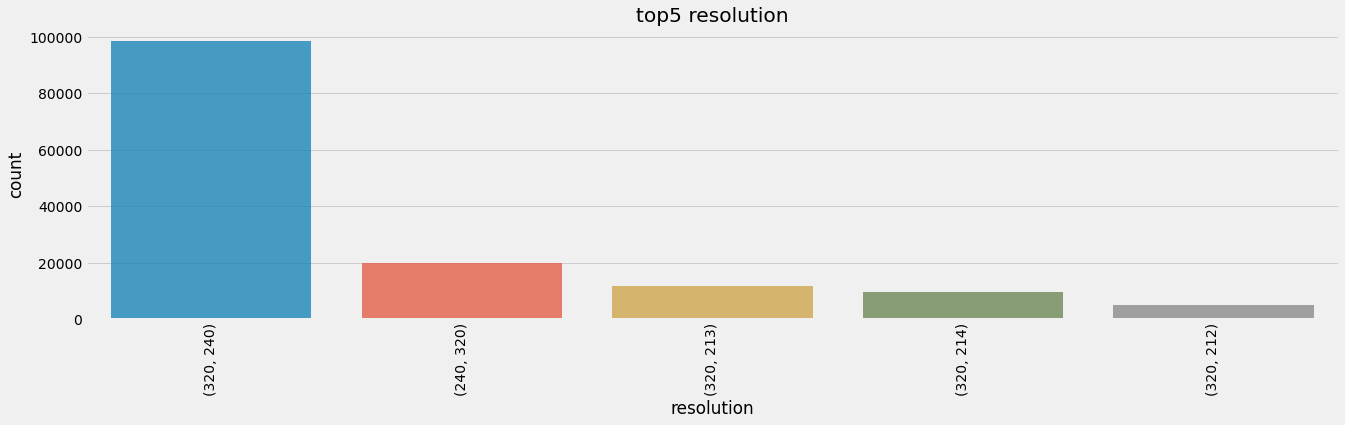

time: 406 ms (started: 2022-02-24 14:51:15 +01:00)


In [15]:
res_count = df['resolution'].value_counts()[:5]

plt.figure(figsize=(20,5))
sns.barplot(x=res_count.index, y=res_count.values, alpha=0.8)
plt.xticks(rotation=90)
plt.title("top5 resolution")
plt.xlabel("resolution")
plt.ylabel("count");

In [54]:
df = df[df['resolution']=='(320, 240)']
len(df)

98344

time: 532 ms (started: 2022-02-24 16:58:52 +01:00)


In [27]:
format_count = df['format'].value_counts()
format_count

jpg    215410
Name: format, dtype: int64

time: 31 ms (started: 2022-01-07 11:28:20 +01:00)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215410 entries, 0 to 215409
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   file_name                 215410 non-null  object 
 1   file_path                 215410 non-null  object 
 2   resolution                215410 non-null  object 
 3   file_year                 215410 non-null  int64  
 4   image_id                  215410 non-null  int64  
 5   format                    215410 non-null  object 
 6   observation               215410 non-null  object 
 7   label                     215410 non-null  object 
 8   image_url                 215410 non-null  object 
 9   user                      215410 non-null  object 
 10  date                      215410 non-null  object 
 11  thumbnail                 215410 non-null  int64  
 12  location                  215408 non-null  object 
 13  gbif_info.kingdom         204271 non-null  o

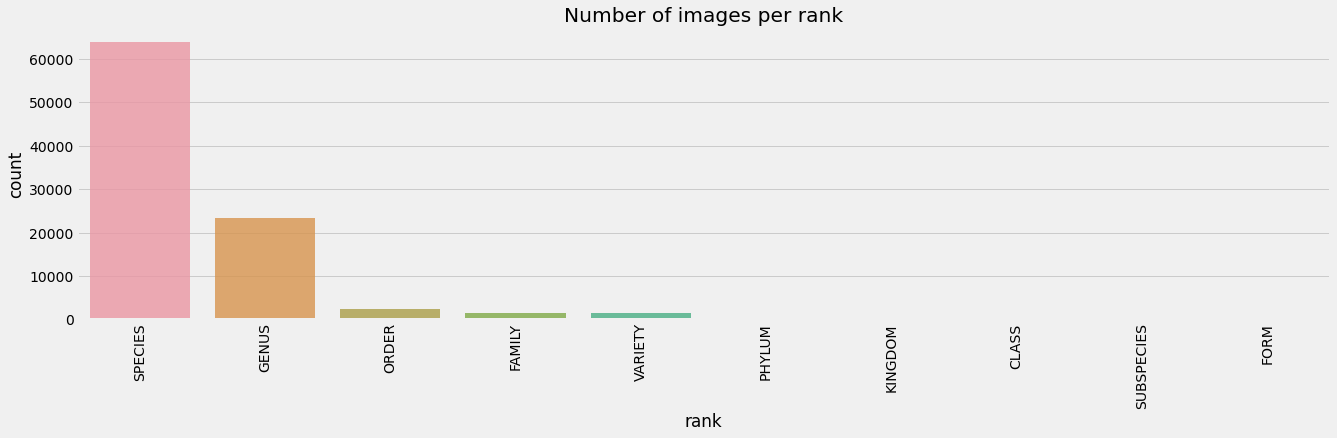

time: 375 ms (started: 2022-02-24 16:59:20 +01:00)


In [55]:
fig = plt.figure(figsize=(20,5))
val_count = df['gbif_info.rank'].value_counts()[:50]
sns.barplot(x=val_count.index,y= val_count.values, alpha=0.8)
plt.xticks(rotation=90);
plt.title('Number of images per rank')
plt.ylabel("count")
plt.xlabel("rank");

In [56]:
val_count

SPECIES       64012
GENUS         23424
ORDER          2331
FAMILY         1560
VARIETY        1455
PHYLUM          229
KINGDOM         226
CLASS           182
SUBSPECIES      144
FORM            110
Name: gbif_info.rank, dtype: int64

time: 0 ns (started: 2022-02-24 17:03:26 +01:00)


In [57]:
nb_species=len(df['gbif_info.species'].value_counts())
nb_genus=len(df['gbif_info.genus'].value_counts())
nb_order=len(df['gbif_info.order'].value_counts())
nb_family=len(df['gbif_info.family'].value_counts())
nb_kingdom=len(df['gbif_info.kingdom'].value_counts())
nb_class=len(df['gbif_info.class'].value_counts())
nb_phylum=len(df['gbif_info.phylum'].value_counts())

time: 78 ms (started: 2022-02-24 17:04:30 +01:00)


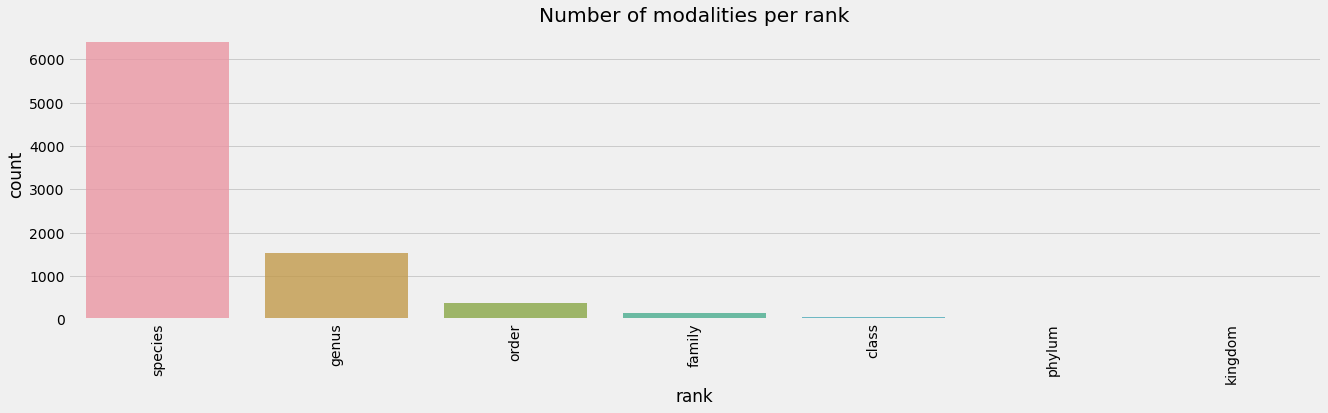

time: 531 ms (started: 2022-02-24 17:04:35 +01:00)


In [58]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x=['species','genus','order','family','class','phylum','kingdom'],
            y=[nb_species,nb_genus,nb_family,nb_order,nb_class,nb_phylum,nb_kingdom], alpha=0.8)
plt.xticks(rotation=90);
plt.title('Number of modalities per rank')
plt.xlabel('rank')
plt.ylabel("count");

In [59]:
print("nombre de modalités pour species:",nb_species)
print("nombre de modalités pour genus:  ",nb_genus)
print("nombre de modalités pour family: ",nb_family)
print("nombre de modalités pour order:  ",nb_order)
print("nombre de modalités pour class:  ",nb_class)
print("nombre de modalités pour phylum: ",nb_phylum)
print("nombre de modalités pour kingdom:",nb_kingdom)

nombre de modalités pour species: 6405
nombre de modalités pour genus:   1541
nombre de modalités pour family:  390
nombre de modalités pour order:   148
nombre de modalités pour class:   48
nombre de modalités pour phylum:  19
nombre de modalités pour kingdom: 7
time: 0 ns (started: 2022-02-24 17:04:40 +01:00)


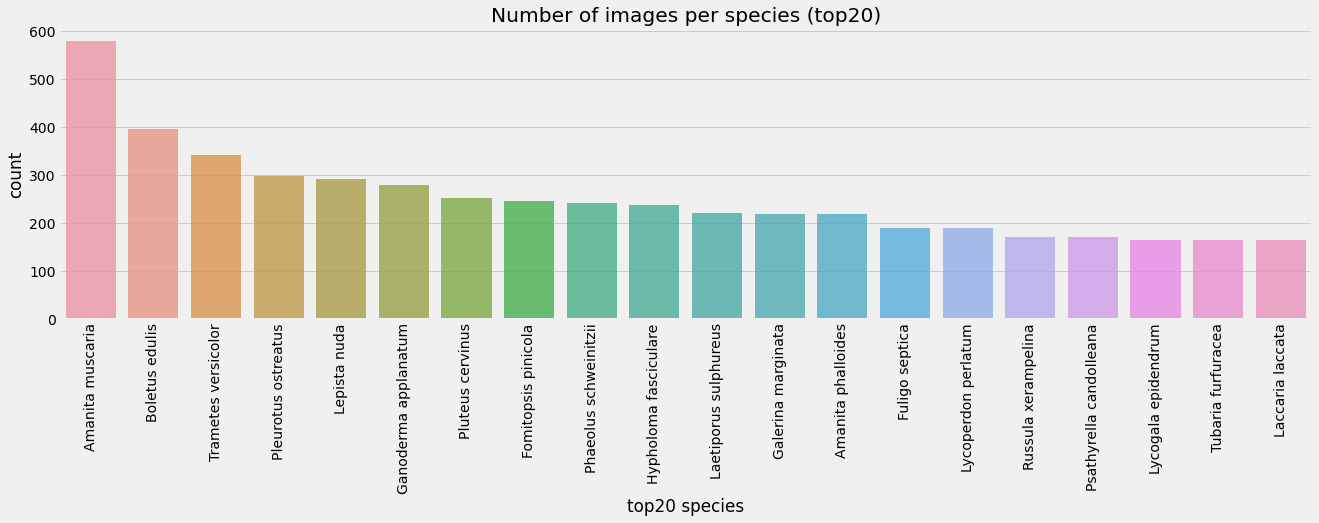

time: 375 ms (started: 2022-02-24 17:08:18 +01:00)


In [60]:
fig = plt.figure(figsize=(20,5))
val_count = df['gbif_info.species'].value_counts()[:20]
sns.barplot(x=val_count.index,y= val_count.values, alpha=0.8)
plt.xticks(rotation=90);
plt.title('Number of images per species (top20)')
plt.ylabel("count")
plt.xlabel("top20 species");

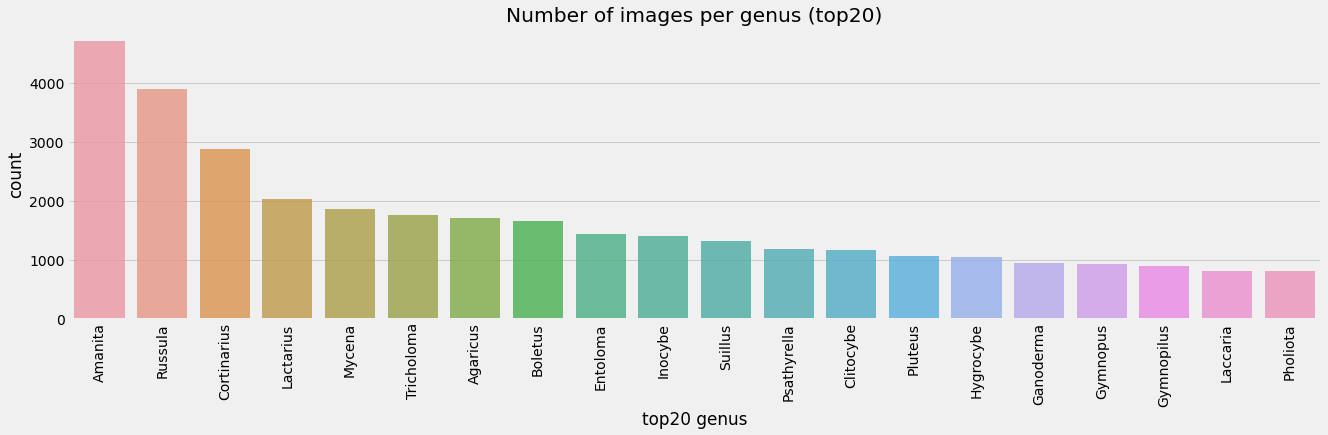

time: 282 ms (started: 2022-02-24 17:09:55 +01:00)


In [61]:
fig = plt.figure(figsize=(20,5))
val_count = df['gbif_info.genus'].value_counts()[:20]
sns.barplot(x=val_count.index,y= val_count.values, alpha=0.8)
plt.xticks(rotation=90);
plt.title('Number of images per genus (top20)')
plt.ylabel("count")
plt.xlabel("top20 genus");

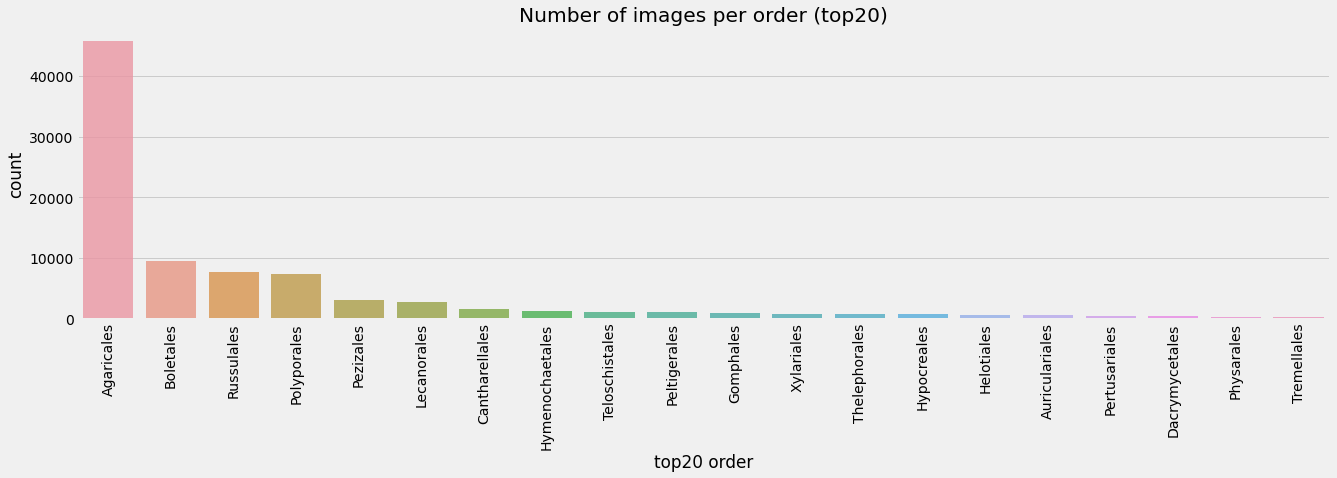

time: 297 ms (started: 2022-02-24 17:11:56 +01:00)


In [62]:
fig = plt.figure(figsize=(20,5))
val_count = df['gbif_info.order'].value_counts()[:20]
sns.barplot(x=val_count.index,y= val_count.values, alpha=0.8)
plt.xticks(rotation=90);
plt.title('Number of images per order (top20)')
plt.ylabel("count")
plt.xlabel("top20 order");

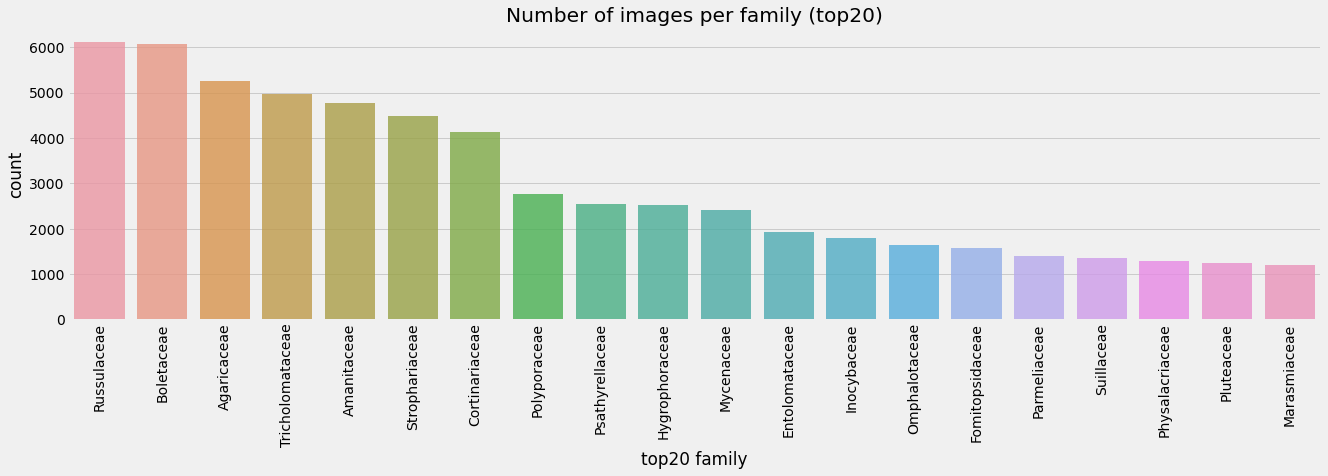

time: 250 ms (started: 2022-02-24 17:21:35 +01:00)


In [63]:
fig = plt.figure(figsize=(20,5))
val_count = df['gbif_info.family'].value_counts()[:20]
sns.barplot(x=val_count.index,y= val_count.values, alpha=0.8)
plt.xticks(rotation=90);
plt.title('Number of images per family (top20)')
plt.ylabel("count")
plt.xlabel("top20 family");

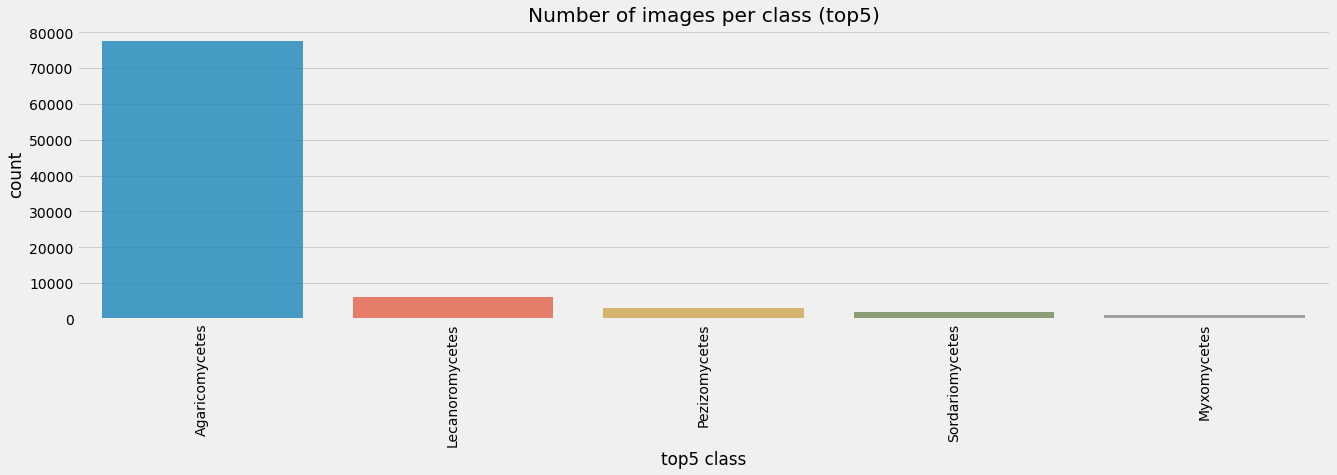

time: 172 ms (started: 2022-02-24 17:26:53 +01:00)


In [65]:
fig = plt.figure(figsize=(20,5))
val_count = df['gbif_info.class'].value_counts()[:5]
sns.barplot(x=val_count.index,y= val_count.values, alpha=0.8)
plt.xticks(rotation=90);
plt.title('Number of images per class (top5)')
plt.ylabel("count")
plt.xlabel("top5 class");

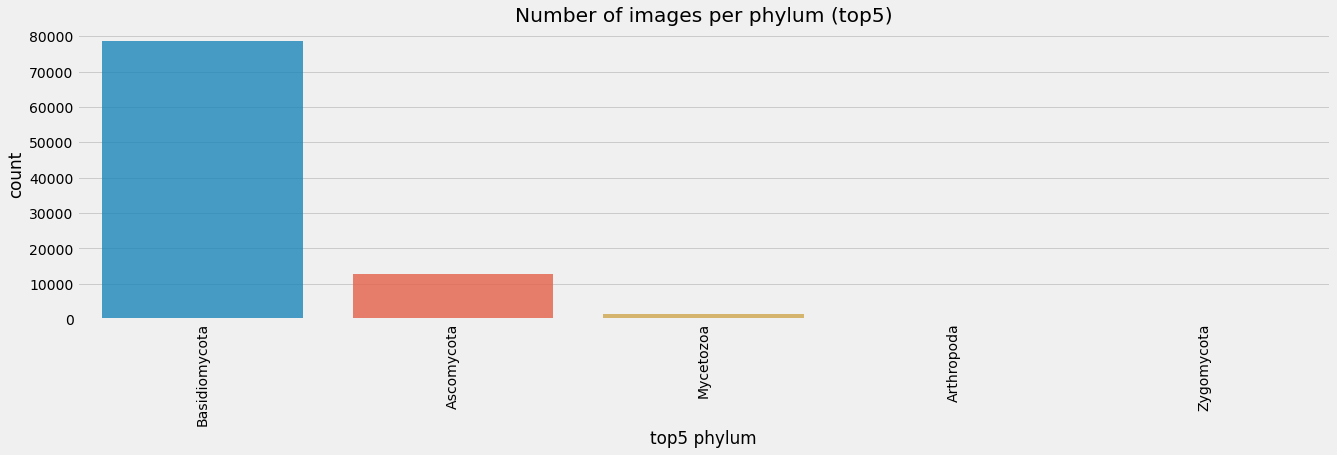

time: 172 ms (started: 2022-02-24 17:28:16 +01:00)


In [66]:
fig = plt.figure(figsize=(20,5))
val_count = df['gbif_info.phylum'].value_counts()[:5]
sns.barplot(x=val_count.index,y= val_count.values, alpha=0.8)
plt.xticks(rotation=90);
plt.title('Number of images per phylum (top5)')
plt.ylabel("count")
plt.xlabel("top5 phylum");

In [29]:
def plot_fig():
  fig = plt.figure(figsize=(20,5))
  sns.barplot(x=val_count.index,y= val_count.values, alpha=0.8)
  plt.xticks(rotation=90);
  plt.title('Number of images per.{}'.format(val_count.name))
  plt.close()
  return fig

time: 0 ns (started: 2022-01-07 11:31:19 +01:00)


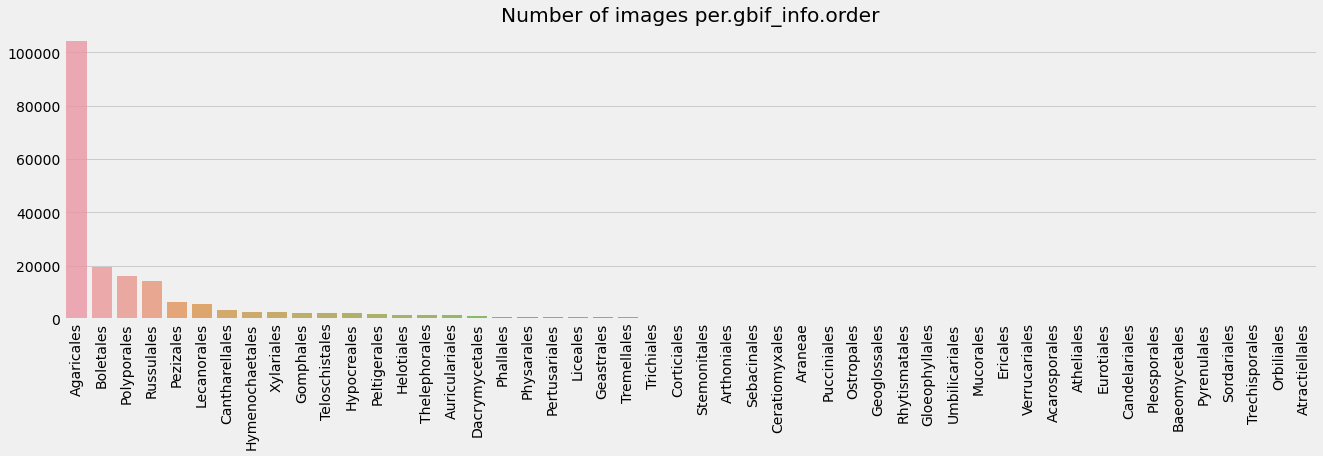

------------------------------------------------------------------------------------------------------------------------------------------------------


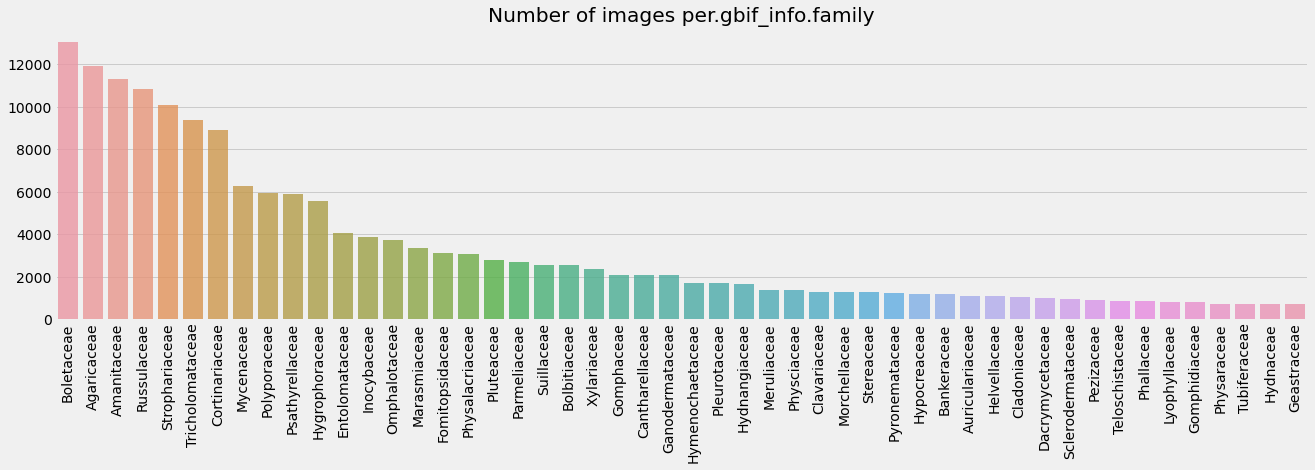

------------------------------------------------------------------------------------------------------------------------------------------------------


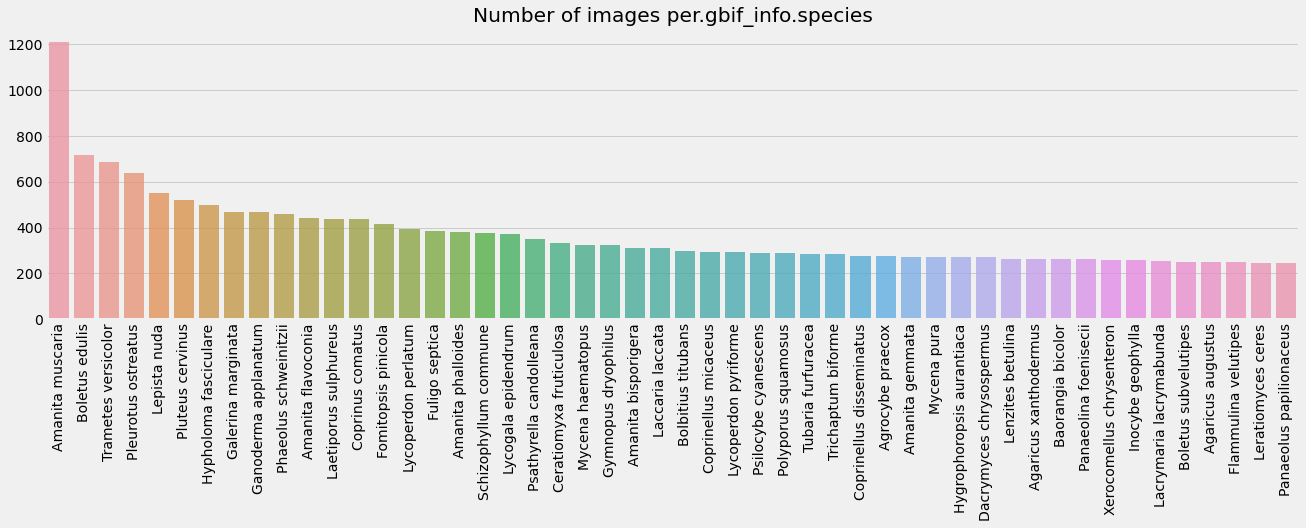

------------------------------------------------------------------------------------------------------------------------------------------------------
time: 1.64 s (started: 2022-01-07 11:32:20 +01:00)


In [30]:
for col in ['gbif_info.order','gbif_info.family','gbif_info.species']:
  val_count = df[col].value_counts()[:50]
  fig = plot_fig()
  display(fig)
  print('-'*150)

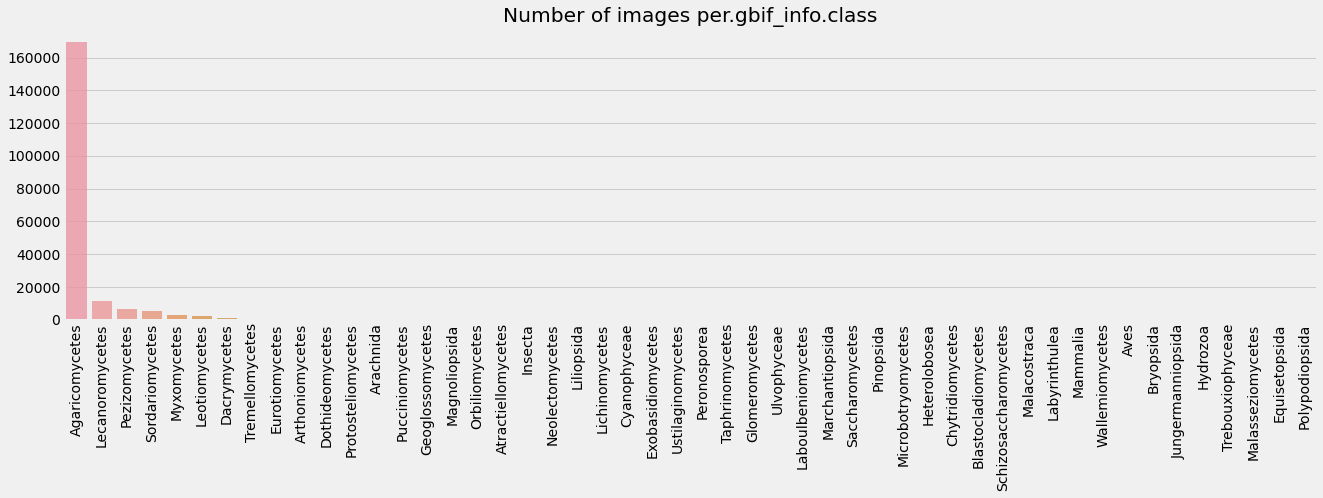

time: 625 ms (started: 2022-01-07 11:42:19 +01:00)


In [31]:
val_count = df['gbif_info.class'].value_counts()[:50]
fig = plot_fig()
display(fig)

In [39]:
df_agari=df[df['gbif_info.class']=='Agaricomycetes']
df_agari.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169498 entries, 0 to 215388
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   file_name                 169498 non-null  object 
 1   file_path                 169498 non-null  object 
 2   resolution                169498 non-null  object 
 3   file_year                 169498 non-null  int64  
 4   image_id                  169498 non-null  int64  
 5   format                    169498 non-null  object 
 6   observation               169498 non-null  object 
 7   label                     169498 non-null  object 
 8   image_url                 169498 non-null  object 
 9   user                      169498 non-null  object 
 10  date                      169498 non-null  object 
 11  thumbnail                 169498 non-null  int64  
 12  location                  169496 non-null  object 
 13  gbif_info.kingdom         169498 non-null  o

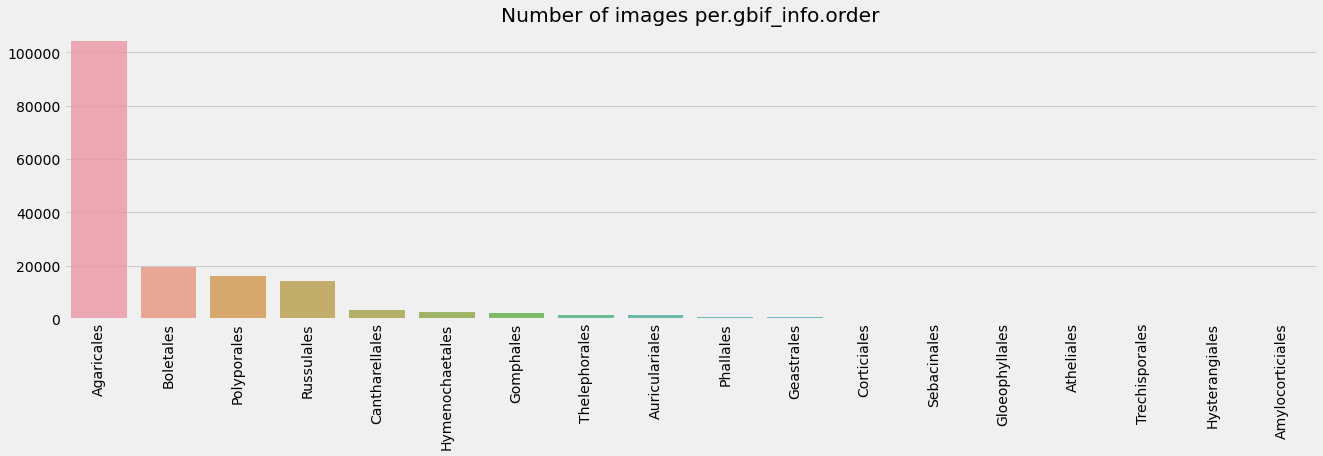

------------------------------------------------------------------------------------------------------------------------------------------------------


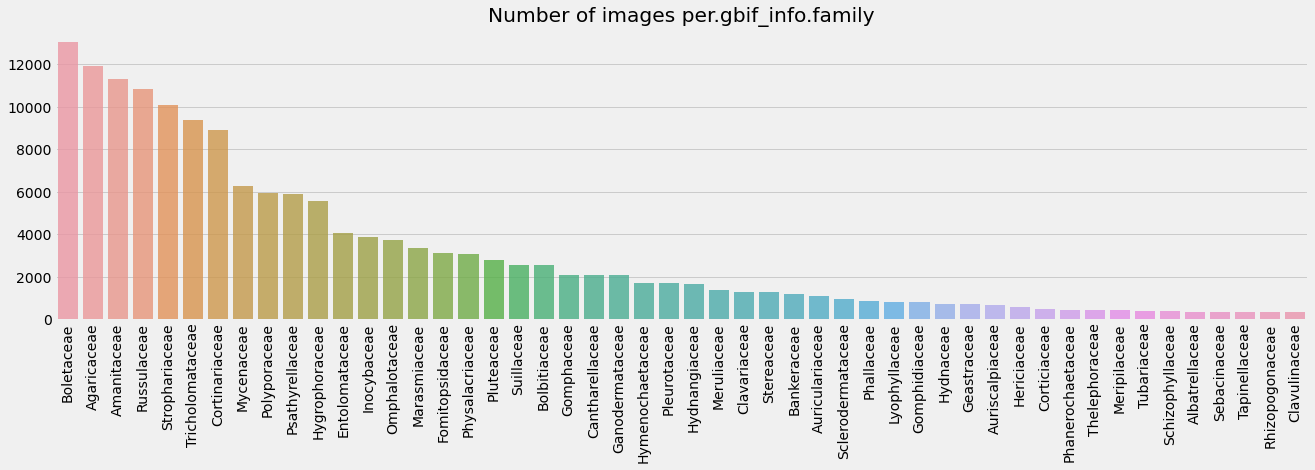

------------------------------------------------------------------------------------------------------------------------------------------------------


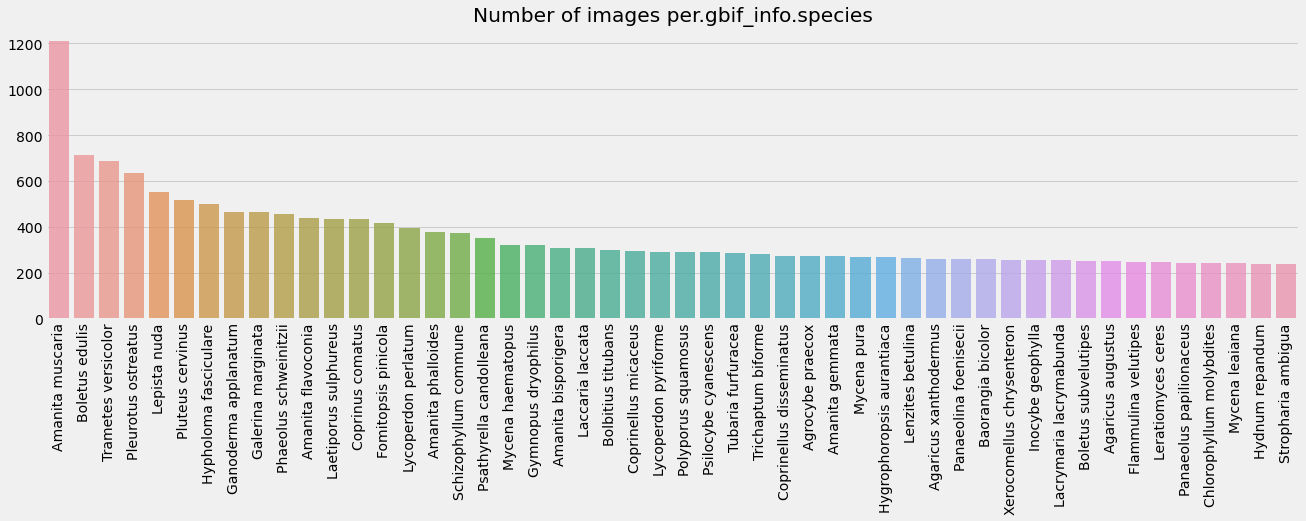

------------------------------------------------------------------------------------------------------------------------------------------------------
time: 1.38 s (started: 2022-01-07 11:51:57 +01:00)


In [42]:
for col in ['gbif_info.order','gbif_info.family','gbif_info.species']:
  val_count = df_agari[col].value_counts()[:50]
  fig = plot_fig()
  display(fig)
  print('-'*150)

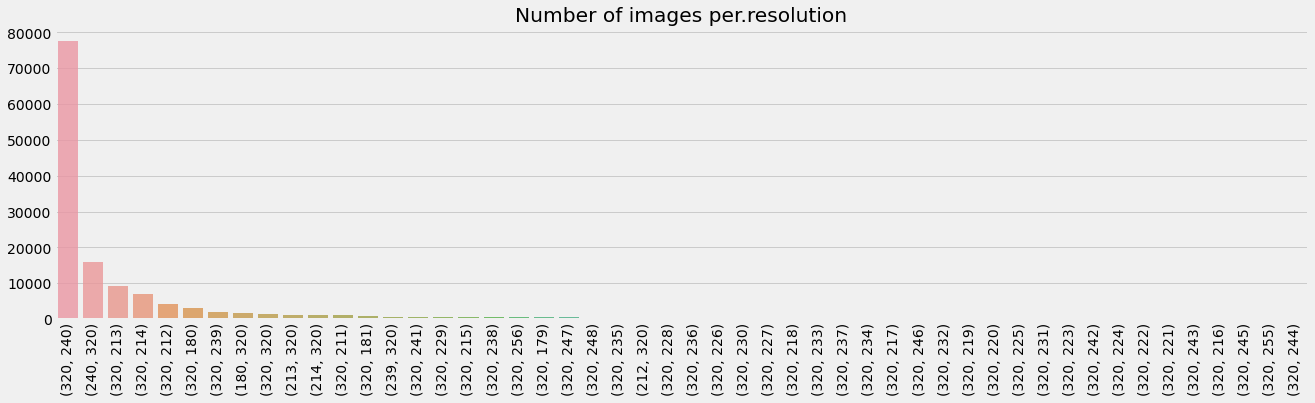

time: 578 ms (started: 2022-01-07 11:54:40 +01:00)


In [43]:
val_count = df_agari['resolution'].value_counts()[:50]
fig = plot_fig()
display(fig)

In [46]:
df_agari['gbif_info.species'].value_counts().shape

(5655,)

time: 32 ms (started: 2022-01-07 12:00:50 +01:00)


In [48]:
df_agari_species=pd.DataFrame(df_agari['gbif_info.species'].value_counts())
df_agari_species

,gbif_info.species
Amanita muscaria,1209
Boletus edulis,714
Trametes versicolor,686
Pleurotus ostreatus,637
Lepista nuda,552
...,...
Psathyrella pseudotrepida,1
Pluteus luteus,1
Favolaschia filopes,1
Psilocybe polycephala,1


time: 31 ms (started: 2022-01-07 12:03:49 +01:00)


In [50]:
df_agari_species[df_agari_species['gbif_info.species']>200].shape

(82, 1)

time: 0 ns (started: 2022-01-07 12:05:43 +01:00)


In [51]:
df_agari['gbif_info.family'].value_counts().shape

(106,)

time: 15 ms (started: 2022-01-07 12:07:09 +01:00)


In [53]:
df_agari_family=pd.DataFrame(df_agari['gbif_info.family'].value_counts())
df_agari_family[df_agari_family['gbif_info.family']>200].shape

(57, 1)

time: 15 ms (started: 2022-01-07 12:09:42 +01:00)


In [57]:
#save the file filtered on the class Agaricomycetes
df_agari.to_csv(path_or_buf=root_dir + 'agaricomycetes.csv',index=False)

time: 3.22 s (started: 2022-01-07 12:23:55 +01:00)


In [58]:
#load database agaricales
df_agari =  pd.read_csv(root_dir + 'agaricomycetes.csv')

time: 1.58 s (started: 2022-01-07 12:24:05 +01:00)


C:\Users\sioha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,9,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [61]:
df_agari.head()

,file_name,file_path,resolution,file_year,image_id,format,observation,label,image_url,user,...,gbif_info.canonicalName,gbif_info.phylumKey,gbif_info.class,gbif_info.synonym,gbif_info.scientificName,gbif_info.genus,gbif_info.order,gbif_info.note,gbif_info,json_file
0,1208.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(243, 320)",2006,1208,jpg,1007,Agaricales,http://mushroomobserver.org/images/320/1208,25,...,Agaricales,34.0,Agaricomycetes,False,Agaricales,NaN,Agaricales,NaN,NaN,JSON\observations_0.json
1,1604.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 164)",2006,1604,jpg,1535,Agaricales,http://mushroomobserver.org/images/320/1604,43,...,Agaricales,34.0,Agaricomycetes,False,Agaricales,NaN,Agaricales,NaN,NaN,JSON\observations_0.json
2,1608.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 286)",2006,1608,jpg,1537,Agaricales,http://mushroomobserver.org/images/320/1608,43,...,Agaricales,34.0,Agaricomycetes,False,Agaricales,NaN,Agaricales,NaN,NaN,JSON\observations_0.json
3,29.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(240, 320)",2006,29,jpg,23,Agaricales,http://mushroomobserver.org/images/320/29,1,...,Agaricales,34.0,Agaricomycetes,False,Agaricales,NaN,Agaricales,NaN,NaN,JSON\observations_0.json
4,680.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(240, 320)",2006,680,jpg,536,Agaricus,http://mushroomobserver.org/images/320/680,1,...,Agaricus,34.0,Agaricomycetes,False,Agaricus,Agaricus,Agaricales,NaN,NaN,JSON\observations_0.json


time: 15 ms (started: 2022-01-07 12:25:07 +01:00)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215410 entries, 0 to 215409
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   file_name                 215410 non-null  object 
 1   file_path                 215410 non-null  object 
 2   resolution                215410 non-null  object 
 3   file_year                 215410 non-null  int64  
 4   image_id                  215410 non-null  int64  
 5   format                    215410 non-null  object 
 6   observation               215410 non-null  object 
 7   label                     215410 non-null  object 
 8   image_url                 215410 non-null  object 
 9   user                      215410 non-null  object 
 10  date                      215410 non-null  object 
 11  thumbnail                 215410 non-null  int64  
 12  location                  215408 non-null  object 
 13  gbif_info.kingdom         204271 non-null  o

In [67]:
df2_agari=df_agari.dropna(axis=0,how='any',subset=['gbif_info.family','gbif_info.species'])
df2_agari.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112083 entries, 7 to 169497
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   file_name                 112083 non-null  object 
 1   file_path                 112083 non-null  object 
 2   resolution                112083 non-null  object 
 3   file_year                 112083 non-null  int64  
 4   image_id                  112083 non-null  int64  
 5   format                    112083 non-null  object 
 6   observation               112083 non-null  object 
 7   label                     112083 non-null  object 
 8   image_url                 112083 non-null  object 
 9   user                      112083 non-null  object 
 10  date                      112083 non-null  object 
 11  thumbnail                 112083 non-null  int64  
 12  location                  112081 non-null  object 
 13  gbif_info.kingdom         112083 non-null  o

In [68]:
df2=pd.crosstab(df2_agari['gbif_info.family'],df2_agari['gbif_info.species'])
df2

gbif_info.species,Abortiporus biennis,Abrachium floriforme,Acanthobasidium delicatum,Acanthobasidium penicillatum,Acanthobasidium phragmitis,Acanthophysellum canadense,Acanthophysellum lividocoeruleum,Aegerita webberi,Afrocantharellus platyphyllus,Agaricus abruptibulbus,...,Xylodon bugellensis,Xylodon detriticus,Xylodon juniperi,Xylodon nespori,Xylodon pruni,Xylodon radula,Xylodon rimosissimus,Xylodon sambuci,Xylodon tuberculatus,Zelleromyces cinnabarinus
gbif_info.family,,,,,,,,,,,,,,,,,,,,,
Agaricaceae,0,0,0,0,0,0,0,0,0,34,...,0,0,0,0,0,0,0,0,0,0
Albatrellaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amanitaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amylocorticiaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amylostereaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tricholomataceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tubariaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tulasnellaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 781 ms (started: 2022-01-07 12:31:34 +01:00)


In [84]:
df2_agari_species=pd.DataFrame(df2_agari['gbif_info.species'].value_counts())
df2_agari_species=df2_agari_species[df2_agari_species['gbif_info.species']>200]
df2_agari_species=df2_agari_species.reset_index()
df2_agari_species=df2_agari_species.rename({'index':'species'},axis=1)
print(df2_agari_species.shape)
df2_agari_species

(80, 2)


,species,gbif_info.species
0,Amanita muscaria,1209
1,Boletus edulis,714
2,Trametes versicolor,686
3,Pleurotus ostreatus,637
4,Lepista nuda,552
...,...,...
75,Daedaleopsis confragosa,204
76,Suillus luteus,203
77,Amanita calyptroderma,203
78,Turbinellus floccosus,203


time: 32 ms (started: 2022-01-07 12:55:18 +01:00)


In [85]:
df2_agari_family=pd.DataFrame(df2_agari['gbif_info.family'].value_counts())
df2_agari_family=df2_agari_family[df2_agari_family['gbif_info.family']>200]
df2_agari_family=df2_agari_family.reset_index()
df2_agari_family=df2_agari_family.rename({'index':'family'},axis=1)
print(df2_agari_family.shape)
df2_agari_family

(55, 2)


,family,gbif_info.family
0,Boletaceae,9837
1,Agaricaceae,8172
2,Russulaceae,7709
3,Amanitaceae,7694
4,Strophariaceae,7355
5,Tricholomataceae,6815
6,Polyporaceae,4837
7,Cortinariaceae,4761
8,Hygrophoraceae,4217
9,Mycenaceae,3890


time: 31 ms (started: 2022-01-07 12:56:24 +01:00)


In [89]:
#uniquement pour la class agaricomycetes et par de valeur manquante pour species et family
print("total images avec au moins 200 par specie:",df2_agari_species['gbif_info.species'].sum())
print("total images avec au moins 200 par family:",df2_agari_family['gbif_info.family'].sum())

total images avec au moins 200 par specie: 24572
total images avec au moins 200 par family: 109815
time: 0 ns (started: 2022-01-07 13:02:22 +01:00)


In [97]:
df2_agari['resolution'].value_counts()

(320, 240)    53520
(240, 320)     9801
(320, 213)     6529
(320, 214)     4489
(320, 212)     2872
              ...  
(80, 80)          1
(300, 199)        1
(160, 134)        1
(320, 89)         1
(206, 153)        1
Name: resolution, Length: 528, dtype: int64

time: 31 ms (started: 2022-01-07 14:53:41 +01:00)


In [139]:
df3=df2_agari[df2_agari['resolution']=='(320, 240)']
df3.head()

,file_name,file_path,resolution,file_year,image_id,format,observation,label,image_url,user,...,gbif_info.canonicalName,gbif_info.phylumKey,gbif_info.class,gbif_info.synonym,gbif_info.scientificName,gbif_info.genus,gbif_info.order,gbif_info.note,gbif_info,json_file
7,710.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 240)",2006,710,jpg,557,Agaricus albolutescens,http://mushroomobserver.org/images/320/710,1,...,Agaricus albolutescens,34.0,Agaricomycetes,False,"Agaricus albolutescens Zeller, 1938",Agaricus,Agaricales,NaN,NaN,JSON\observations_0.json
8,707.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 240)",2006,707,jpg,555,Agaricus augustus,http://mushroomobserver.org/images/320/707,1,...,Agaricus augustus,34.0,Agaricomycetes,False,"Agaricus augustus Fr., 1838",Agaricus,Agaricales,NaN,NaN,JSON\observations_0.json
9,708.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 240)",2006,708,jpg,556,Agaricus augustus,http://mushroomobserver.org/images/320/708,1,...,Agaricus augustus,34.0,Agaricomycetes,False,"Agaricus augustus Fr., 1838",Agaricus,Agaricales,NaN,NaN,JSON\observations_0.json
10,731.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 240)",2006,731,jpg,589,Agaricus augustus,http://mushroomobserver.org/images/320/731,2,...,Agaricus augustus,34.0,Agaricomycetes,False,"Agaricus augustus Fr., 1838",Agaricus,Agaricales,NaN,NaN,JSON\observations_0.json
12,705.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 240)",2006,705,jpg,553,Agaricus bisporus,http://mushroomobserver.org/images/320/705,1,...,Agaricus bisporus,34.0,Agaricomycetes,False,"Agaricus bisporus (J.E. Lange) Imbach, 1946",Agaricus,Agaricales,NaN,NaN,JSON\observations_0.json


time: 94 ms (started: 2022-01-07 15:55:18 +01:00)


In [140]:
df3['gbif_info.family'].value_counts()

Boletaceae          4661
Russulaceae         4356
Agaricaceae         3757
Tricholomataceae    3615
Strophariaceae      3307
                    ... 
Phelloriniaceae        1
Sclerogastraceae       1
Gastrosporiaceae       1
Jaapiaceae             1
Gloeodontiaceae        1
Name: gbif_info.family, Length: 96, dtype: int64

time: 15 ms (started: 2022-01-07 15:55:22 +01:00)


In [141]:
top10_family=pd.DataFrame(df3['gbif_info.family'].value_counts()).head(10)
top10_family=top10_family.reset_index()
top10_family
top10_family=top10_family['index']
top10_family

0          Boletaceae
1         Russulaceae
2         Agaricaceae
3    Tricholomataceae
4      Strophariaceae
5         Amanitaceae
6        Polyporaceae
7      Cortinariaceae
8      Hygrophoraceae
9          Mycenaceae
Name: index, dtype: object

time: 15 ms (started: 2022-01-07 15:55:28 +01:00)


In [143]:
top10_family[0]

'Boletaceae'

time: 0 ns (started: 2022-01-07 15:56:24 +01:00)


In [144]:
top10_family[9]

'Mycenaceae'

time: 0 ns (started: 2022-01-07 15:57:08 +01:00)


In [146]:
df4=df3[(df3['gbif_info.family']==top10_family[0])|(df3['gbif_info.family']==top10_family[1])|
        (df3['gbif_info.family']==top10_family[2])|(df3['gbif_info.family']==top10_family[3])|
        (df3['gbif_info.family']==top10_family[4])|(df3['gbif_info.family']==top10_family[5])|
        (df3['gbif_info.family']==top10_family[6])|(df3['gbif_info.family']==top10_family[7])|
        (df3['gbif_info.family']==top10_family[8])|(df3['gbif_info.family']==top10_family[9])]

time: 125 ms (started: 2022-01-07 16:00:41 +01:00)


In [148]:
df4['gbif_info.family'].value_counts()

Boletaceae          4661
Russulaceae         4356
Agaricaceae         3757
Tricholomataceae    3615
Strophariaceae      3307
Amanitaceae         3300
Polyporaceae        2316
Cortinariaceae      2119
Hygrophoraceae      1982
Mycenaceae          1511
Name: gbif_info.family, dtype: int64

time: 15 ms (started: 2022-01-07 16:01:35 +01:00)


In [149]:
df4.head()

,file_name,file_path,resolution,file_year,image_id,format,observation,label,image_url,user,...,gbif_info.canonicalName,gbif_info.phylumKey,gbif_info.class,gbif_info.synonym,gbif_info.scientificName,gbif_info.genus,gbif_info.order,gbif_info.note,gbif_info,json_file
7,710.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 240)",2006,710,jpg,557,Agaricus albolutescens,http://mushroomobserver.org/images/320/710,1,...,Agaricus albolutescens,34.0,Agaricomycetes,False,"Agaricus albolutescens Zeller, 1938",Agaricus,Agaricales,NaN,NaN,JSON\observations_0.json
8,707.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 240)",2006,707,jpg,555,Agaricus augustus,http://mushroomobserver.org/images/320/707,1,...,Agaricus augustus,34.0,Agaricomycetes,False,"Agaricus augustus Fr., 1838",Agaricus,Agaricales,NaN,NaN,JSON\observations_0.json
9,708.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 240)",2006,708,jpg,556,Agaricus augustus,http://mushroomobserver.org/images/320/708,1,...,Agaricus augustus,34.0,Agaricomycetes,False,"Agaricus augustus Fr., 1838",Agaricus,Agaricales,NaN,NaN,JSON\observations_0.json
10,731.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 240)",2006,731,jpg,589,Agaricus augustus,http://mushroomobserver.org/images/320/731,2,...,Agaricus augustus,34.0,Agaricomycetes,False,"Agaricus augustus Fr., 1838",Agaricus,Agaricales,NaN,NaN,JSON\observations_0.json
12,705.jpg,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,"(320, 240)",2006,705,jpg,553,Agaricus bisporus,http://mushroomobserver.org/images/320/705,1,...,Agaricus bisporus,34.0,Agaricomycetes,False,"Agaricus bisporus (J.E. Lange) Imbach, 1946",Agaricus,Agaricales,NaN,NaN,JSON\observations_0.json


time: 16 ms (started: 2022-01-07 16:02:22 +01:00)


In [150]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30924 entries, 7 to 169437
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   file_name                 30924 non-null  object 
 1   file_path                 30924 non-null  object 
 2   resolution                30924 non-null  object 
 3   file_year                 30924 non-null  int64  
 4   image_id                  30924 non-null  int64  
 5   format                    30924 non-null  object 
 6   observation               30924 non-null  object 
 7   label                     30924 non-null  object 
 8   image_url                 30924 non-null  object 
 9   user                      30924 non-null  object 
 10  date                      30924 non-null  object 
 11  thumbnail                 30924 non-null  int64  
 12  location                  30924 non-null  object 
 13  gbif_info.kingdom         30924 non-null  object 
 14  gbif_

In [154]:
df4['resolution'].value_counts()

(320, 240)    30924
Name: resolution, dtype: int64

time: 47 ms (started: 2022-01-07 17:24:05 +01:00)


In [157]:
df5=df4[['file_path','image_id','gbif_info.family']]
df5=df5.reset_index()
df5=df5.drop('index',axis=1)
df5

,file_path,image_id,gbif_info.family
0,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,710,Agaricaceae
1,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,707,Agaricaceae
2,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,708,Agaricaceae
3,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,731,Agaricaceae
4,C:/Users/sioha/Projet_mushroom/IMAGES/2006\Aga...,705,Agaricaceae
...,...,...,...
30919,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Xer...,624033,Mycenaceae
30920,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Xer...,645458,Mycenaceae
30921,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Xer...,655221,Mycenaceae
30922,C:/Users/sioha/Projet_mushroom/IMAGES/2016\Xer...,657282,Mycenaceae


time: 31 ms (started: 2022-01-07 17:26:42 +01:00)


In [158]:
df5.to_csv(path_or_buf=root_dir + 'df_essai.csv',index=False)

time: 109 ms (started: 2022-01-07 17:28:38 +01:00)


In [7]:
df_essai =  pd.read_csv(root_dir + 'df_essai.csv')

time: 110 ms (started: 2022-01-09 13:19:09 +01:00)


In [8]:
img_id_list=df_essai['image_id']
img_path_list=df_essai['file_path']
img_family_list=df_essai['gbif_info.family']

time: 0 ns (started: 2022-01-09 13:19:14 +01:00)


In [9]:
img_id_list

0           710
1           707
2           708
3           731
4           705
          ...  
30919    624033
30920    645458
30921    655221
30922    657282
30923    646736
Name: image_id, Length: 30924, dtype: int64

time: 0 ns (started: 2022-01-09 13:19:18 +01:00)


time: 0 ns (started: 2022-01-07 17:50:12 +01:00)


4it [00:00, 308.50it/s]

time: 16 ms (started: 2022-01-07 18:26:03 +01:00)


{710: array([[[90, 71, 57],
         [87, 68, 54],
         [72, 54, 40],
         ...,
         [ 9,  9,  7],
         [ 2,  2,  0],
         [ 7,  7,  5]],
 
        [[74, 57, 47],
         [42, 25, 15],
         [25,  9,  0],
         ...,
         [ 8,  7,  3],
         [ 8,  9,  4],
         [22, 23, 18]],
 
        [[21, 10,  4],
         [28, 17, 11],
         [36, 26, 17],
         ...,
         [24, 24, 14],
         [28, 28, 18],
         [43, 43, 33]],
 
        ...,
 
        [[22, 14,  3],
         [28, 20,  9],
         [28, 20,  9],
         ...,
         [71, 66, 46],
         [70, 65, 43],
         [83, 78, 56]],
 
        [[42, 30, 14],
         [43, 31, 17],
         [42, 30, 16],
         ...,
         [75, 64, 46],
         [79, 68, 48],
         [67, 56, 36]],
 
        [[85, 69, 53],
         [86, 70, 54],
         [82, 69, 53],
         ...,
         [61, 44, 28],
         [64, 47, 29],
         [64, 47, 29]]], dtype=uint8),
 707: array([[[ 33,  39,  13],
      

time: 0 ns (started: 2022-01-07 18:26:07 +01:00)


In [189]:
image710=imgs_dict[710]

time: 0 ns (started: 2022-01-07 18:30:02 +01:00)


In [191]:
image710.shape

(240, 320, 3)

time: 15 ms (started: 2022-01-07 18:30:18 +01:00)


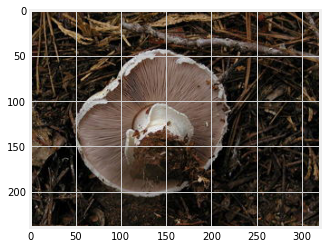

time: 204 ms (started: 2022-01-07 18:30:37 +01:00)


In [192]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
plt.subplot(111)
plt.imshow(image710)

In [10]:
pip install python-resize-image

Note: you may need to restart the kernel to use updated packages.
time: 2.58 s (started: 2022-01-09 13:19:38 +01:00)


In [11]:
from resizeimage import resizeimage

time: 16 ms (started: 2022-01-09 13:19:45 +01:00)


In [197]:
img710=Image.open(img_path_list[0])

time: 16 ms (started: 2022-01-07 18:43:56 +01:00)


In [198]:
img710_resized=resizeimage.resize_height(img710,28)

time: 0 ns (started: 2022-01-07 18:44:25 +01:00)


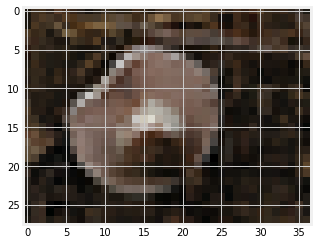

time: 141 ms (started: 2022-01-07 18:54:16 +01:00)


In [202]:
plt.subplot(111)
plt.imshow(img710_resized)

In [12]:
img_family_list

0        Agaricaceae
1        Agaricaceae
2        Agaricaceae
3        Agaricaceae
4        Agaricaceae
            ...     
30919     Mycenaceae
30920     Mycenaceae
30921     Mycenaceae
30922     Mycenaceae
30923     Mycenaceae
Name: gbif_info.family, Length: 30924, dtype: object

time: 140 ms (started: 2022-01-09 13:19:51 +01:00)


In [20]:
#essai chargement de 4 images
img_id_list=img_id_list.iloc[0:4]
img_path_list=img_path_list.iloc[0:4]
img_family_list=img_family_list.iloc[0:4]

imgs_family = pd.DataFrame(columns=['img_id','img_data','family'])
from PIL import ImageFile
from skimage import io
ImageFile.LOAD_TRUNCATED_IMAGES = True #cf error : https://stackoverflow.com/questions/12984426/pil-ioerror-image-file-truncated-with-big-images
for img_id,path,family in tqdm(zip(img_id_list,img_path_list,img_family_list)):  
    img=Image.open(path)
    img_resized=resizeimage.resize_thumbnail(img,[32,24])
    img_resized=img_resized.reshape([3*32*24]
    df_temp=pd.DataFrame([img_id,img_resized,family])
    imgs_family.append(df_temp)

SyntaxError: invalid syntax (Temp/ipykernel_14096/2702486937.py, line 14)

time: 16 ms (started: 2022-01-09 13:30:16 +01:00)


In [27]:
root_dir

'C:/Users/sioha/Projet_mushroom/'

time: 0 ns (started: 2022-01-09 13:38:58 +01:00)


In [42]:
img_id_list=df_essai['image_id']
img_path_list=df_essai['file_path']
img_family_list=df_essai['gbif_info.family']
img_id_list=img_id_list.astype(str)
img_id_list

0           710
1           707
2           708
3           731
4           705
          ...  
30919    624033
30920    645458
30921    655221
30922    657282
30923    646736
Name: image_id, Length: 30924, dtype: object

time: 31 ms (started: 2022-01-09 13:57:39 +01:00)


In [43]:
for path,img_id in tqdm(zip(img_path_list,img_id_list)):  
    img=Image.open(path)
    img_resized=resizeimage.resize_thumbnail(img,[32,24])
    img_resized.save(root_dir+'Images_resized/'+img_id+'.jpg')

30924it [03:31, 146.51it/s]

time: 3min 31s (started: 2022-01-09 13:57:50 +01:00)


In [102]:
img_id_list=df_essai['image_id']
img_id_path_list=root_dir+'Images_resized/'+img_id_list.astype(str)+'.jpg'
img_family_list=df_essai['gbif_info.family']

time: 32 ms (started: 2022-01-09 14:37:00 +01:00)


In [103]:
img_id_list

0           710
1           707
2           708
3           731
4           705
          ...  
30919    624033
30920    645458
30921    655221
30922    657282
30923    646736
Name: image_id, Length: 30924, dtype: int64

time: 0 ns (started: 2022-01-09 14:37:03 +01:00)


In [104]:
img_id_path_list

0        C:/Users/sioha/Projet_mushroom/Images_resized/...
1        C:/Users/sioha/Projet_mushroom/Images_resized/...
2        C:/Users/sioha/Projet_mushroom/Images_resized/...
3        C:/Users/sioha/Projet_mushroom/Images_resized/...
4        C:/Users/sioha/Projet_mushroom/Images_resized/...
                               ...                        
30919    C:/Users/sioha/Projet_mushroom/Images_resized/...
30920    C:/Users/sioha/Projet_mushroom/Images_resized/...
30921    C:/Users/sioha/Projet_mushroom/Images_resized/...
30922    C:/Users/sioha/Projet_mushroom/Images_resized/...
30923    C:/Users/sioha/Projet_mushroom/Images_resized/...
Name: image_id, Length: 30924, dtype: object

time: 0 ns (started: 2022-01-09 14:37:09 +01:00)


In [105]:
imgs_family=[]
for img_id,path,family in tqdm(zip(img_id_list,img_id_path_list,img_family_list)):  
    img_essai = io.imread(path).reshape([3*32*24])
    imgs_family.append([img_id,img_essai,family])

30924it [00:18, 1649.63it/s]

time: 18.8 s (started: 2022-01-09 14:37:14 +01:00)


In [106]:
imgs_family=pd.DataFrame(imgs_family)
imgs_family=imgs_family.rename({0:'img_id',1:'img_data',2:'family'},axis=1)
display(imgs_family)

,img_id,img_data,family
0,710,"[40, 16, 4, 72, 48, 36, 60, 38, 25, 65, 43, 30...",Agaricaceae
1,707,"[29, 43, 28, 43, 56, 38, 50, 62, 38, 45, 54, 2...",Agaricaceae
2,708,"[99, 68, 48, 87, 59, 38, 89, 67, 44, 66, 50, 2...",Agaricaceae
3,731,"[87, 56, 38, 92, 65, 46, 60, 37, 19, 70, 53, 3...",Agaricaceae
4,705,"[137, 139, 134, 136, 138, 135, 134, 138, 137, ...",Agaricaceae
...,...,...,...
30919,624033,"[29, 34, 40, 26, 31, 37, 31, 34, 39, 37, 40, 4...",Mycenaceae
30920,645458,"[86, 67, 37, 85, 66, 36, 85, 65, 38, 88, 68, 4...",Mycenaceae
30921,655221,"[174, 173, 168, 195, 196, 191, 118, 123, 119, ...",Mycenaceae
30922,657282,"[26, 29, 18, 23, 26, 15, 27, 30, 19, 24, 27, 1...",Mycenaceae


time: 47 ms (started: 2022-01-09 14:37:38 +01:00)


In [107]:
imgs_family.to_csv(path_or_buf=root_dir + 'imgs_family.csv',index=False)

time: 1.44 s (started: 2022-01-09 14:39:37 +01:00)


In [148]:
import pandas as pd
imgs_family =  pd.read_csv(root_dir + 'imgs_family.csv')

time: 47 ms (started: 2022-01-10 09:36:41 +01:00)


In [149]:
display(imgs_family)

,img_id,img_data,family
0,710,[40 16 4 ... 49 40 25],Agaricaceae
1,707,[29 43 28 ... 58 68 41],Agaricaceae
2,708,[99 68 48 ... 37 52 33],Agaricaceae
3,731,[87 56 38 ... 80 58 37],Agaricaceae
4,705,[137 139 134 ... 109 121 119],Agaricaceae
...,...,...,...
30919,624033,[29 34 40 ... 47 39 37],Mycenaceae
30920,645458,[86 67 37 ... 36 28 15],Mycenaceae
30921,655221,[174 173 168 ... 90 55 49],Mycenaceae
30922,657282,[26 29 18 ... 34 36 25],Mycenaceae


time: 16 ms (started: 2022-01-10 09:36:43 +01:00)


In [160]:
data=imgs_family[['img_id','img_data']]
data

,img_id,img_data
0,710,[40 16 4 ... 49 40 25]
1,707,[29 43 28 ... 58 68 41]
2,708,[99 68 48 ... 37 52 33]
3,731,[87 56 38 ... 80 58 37]
4,705,[137 139 134 ... 109 121 119]
...,...,...
30919,624033,[29 34 40 ... 47 39 37]
30920,645458,[86 67 37 ... 36 28 15]
30921,655221,[174 173 168 ... 90 55 49]
30922,657282,[26 29 18 ... 34 36 25]


time: 16 ms (started: 2022-01-10 09:43:27 +01:00)


In [163]:
data=data.set_index('img_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30924 entries, 710 to 646736
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_data  30924 non-null  object
dtypes: object(1)
memory usage: 483.2+ KB
time: 16 ms (started: 2022-01-10 09:45:18 +01:00)


In [164]:
data

,img_data
img_id,
710,[40 16 4 ... 49 40 25]
707,[29 43 28 ... 58 68 41]
708,[99 68 48 ... 37 52 33]
731,[87 56 38 ... 80 58 37]
705,[137 139 134 ... 109 121 119]
...,...
624033,[29 34 40 ... 47 39 37]
645458,[86 67 37 ... 36 28 15]
655221,[174 173 168 ... 90 55 49]


time: 0 ns (started: 2022-01-10 09:45:33 +01:00)


In [166]:
data.iloc[0,0]

'[40 16  4 ... 49 40 25]'

time: 0 ns (started: 2022-01-10 09:46:08 +01:00)


In [168]:
data_essai=data.iloc[0,0]
data_essai=pd.Series(data_essai)
data_essai

0    [40 16  4 ... 49 40 25]
dtype: object

time: 15 ms (started: 2022-01-10 09:47:36 +01:00)


In [176]:
data_essai=data_essai.replace(to_replace=' ',value=',')
print(data_essai)

0    [40 16  4 ... 49 40 25]
dtype: object
time: 0 ns (started: 2022-01-10 09:52:56 +01:00)


In [129]:
data=imgs_family['img_data']
data=data.str.split(expand=True)
display(data)

,0,1,2,3,4,5,6,7
0,[40,16,4,...,49,40,25],None
1,[29,43,28,...,58,68,41],None
2,[99,68,48,...,37,52,33],None
3,[87,56,38,...,80,58,37],None
4,[137,139,134,...,109,121,119],None
...,...,...,...,...,...,...,...,...
30919,[29,34,40,...,47,39,37],None
30920,[86,67,37,...,36,28,15],None
30921,[174,173,168,...,90,55,49],None
30922,[26,29,18,...,34,36,25],None


time: 94 ms (started: 2022-01-09 15:20:08 +01:00)


In [177]:
img_id_list=df_essai['image_id']
img_id_path_list=root_dir+'Images_resized/'+img_id_list.astype(str)+'.jpg'
img_family_list=df_essai['gbif_info.family']

time: 47 ms (started: 2022-01-10 10:08:07 +01:00)


In [181]:
root_dir

'C:/Users/sioha/Projet_mushroom/'

time: 0 ns (started: 2022-01-10 10:21:42 +01:00)


In [182]:
# initiate two dicts 
img_dict_ = {}
family_dict_ = {}
# define csv 
feats_csv_path = root_dir + 'images_' + '.csv' # define path
cible_csv_path = root_dir + 'cible' + '.csv' # define path
# loop to get a dict of array for feats representing the images & a dict for cible 
for img_id,path,family in tqdm(zip(img_id_list,img_id_path_list,img_family_list)): 
    img = io.imread(path) 
    #img = resize(img, (32, 24))  # RESIZE usng skimage    
    img = np.array(img) # convert to array 
    img_dict_[img_id] = np.resize(img,32*24*3)
    # target 
    family_dict_[img_id] = family
# concat dict in df
df_X = pd.DataFrame.from_dict(img_dict_, orient = 'index')
df_y = pd.DataFrame.from_dict(family_dict_, orient = 'index')
# save file
df_X.to_csv(feats_csv_path)
df_y.to_csv(cible_csv_path)

30924it [00:54, 563.69it/s]


time: 2min 42s (started: 2022-01-10 10:22:00 +01:00)


In [183]:
# save file
df_X

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
710,40,16,4,72,48,36,60,38,25,65,...,31,53,43,31,52,43,28,49,40,25
707,29,43,28,43,56,38,50,62,38,45,...,27,39,49,22,46,56,29,58,68,41
708,99,68,48,87,59,38,89,67,44,66,...,41,32,47,26,29,44,25,37,52,33
731,87,56,38,92,65,46,60,37,19,70,...,75,108,88,64,68,46,25,80,58,37
705,-119,-117,-122,-120,-118,-121,-122,-118,-119,-124,...,118,110,122,120,110,122,120,109,121,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624033,29,34,40,26,31,37,31,34,39,37,...,45,91,85,85,103,98,95,47,39,37
645458,86,67,37,85,66,36,85,65,38,88,...,30,66,57,42,42,35,19,36,28,15
655221,-82,-83,-88,-61,-60,-65,118,123,119,91,...,58,88,66,55,86,57,49,90,55,49
657282,26,29,18,23,26,15,27,30,19,24,...,42,72,68,56,30,30,18,34,36,25


time: 31 ms (started: 2022-01-10 10:25:52 +01:00)


In [185]:
df_y

,0
710,Agaricaceae
707,Agaricaceae
708,Agaricaceae
731,Agaricaceae
705,Agaricaceae
...,...
624033,Mycenaceae
645458,Mycenaceae
655221,Mycenaceae
657282,Mycenaceae


time: 15 ms (started: 2022-01-10 10:27:23 +01:00)


In [189]:
X=df_X.to_numpy()
y=df_y.to_numpy()

time: 0 ns (started: 2022-01-10 10:36:38 +01:00)


In [190]:
X

array([[ 40,  16,   4, ...,  49,  40,  25],
       [ 29,  43,  28, ...,  58,  68,  41],
       [ 99,  68,  48, ...,  37,  52,  33],
       ...,
       [-82, -83, -88, ...,  90,  55,  49],
       [ 26,  29,  18, ...,  34,  36,  25],
       [  7,   0,   0, ...,  84,  93,  74]], dtype=int8)

time: 0 ns (started: 2022-01-10 10:36:44 +01:00)


In [191]:
y

array([['Agaricaceae'],
       ['Agaricaceae'],
       ['Agaricaceae'],
       ...,
       ['Mycenaceae'],
       ['Mycenaceae'],
       ['Mycenaceae']], dtype=object)

time: 0 ns (started: 2022-01-10 10:37:08 +01:00)


In [198]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cible=le.fit_transform(y.ravel())
cible

array([0, 0, 0, ..., 5, 5, 5])

time: 15 ms (started: 2022-01-10 10:42:11 +01:00)


array([0, 0, 0, ..., 5, 5, 5])

time: 0 ns (started: 2022-01-10 10:40:12 +01:00)


In [199]:
#premier essai classification KNN
from sklearn import neighbors
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,cible,test_size=0.2)

time: 1.52 s (started: 2022-01-10 10:42:30 +01:00)


In [200]:
knn=neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

time: 0 ns (started: 2022-01-10 10:42:34 +01:00)


In [201]:
y_pred=knn.predict(X_test)

time: 20.7 s (started: 2022-01-10 10:44:24 +01:00)


In [202]:
pd.crosstab(y_test,y_pred,rownames=['réalité'],colnames=['prédiction'])

prédiction,0,1,2,3,4,5,6,7,8,9
réalité,,,,,,,,,,
0,299,106,146,19,22,99,10,35,7,42
1,237,88,131,17,16,88,3,28,8,38
2,273,115,202,24,11,189,14,39,7,47
3,127,44,114,13,8,92,5,21,2,20
4,106,40,89,15,13,78,2,21,4,18
5,75,32,72,9,3,70,5,8,4,11
6,153,64,71,10,7,82,4,27,4,27
7,309,97,164,19,27,112,9,59,8,58
8,191,63,158,27,14,150,11,21,3,31


time: 47 ms (started: 2022-01-10 10:45:45 +01:00)


In [203]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.15      0.38      0.21       785
           1       0.12      0.13      0.13       654
           2       0.16      0.22      0.18       921
           3       0.08      0.03      0.04       446
           4       0.09      0.03      0.05       386
           5       0.07      0.24      0.10       289
           6       0.06      0.01      0.02       449
           7       0.19      0.07      0.10       862
           8       0.06      0.00      0.01       669
           9       0.12      0.05      0.07       722

    accuracy                           0.13      6183
   macro avg       0.11      0.12      0.09      6183
weighted avg       0.12      0.13      0.10      6183

time: 31 ms (started: 2022-01-10 10:49:42 +01:00)


In [207]:
img_id_list=df_essai['image_id']
img_id_path_list=root_dir+'Images_resized/'+img_id_list.astype(str)+'.jpg'
img_family_list=df_essai['gbif_info.family']

time: 63 ms (started: 2022-01-10 11:21:22 +01:00)


In [208]:
img_id_list=img_id_list.astype(str)
img_id_list

0           710
1           707
2           708
3           731
4           705
          ...  
30919    624033
30920    645458
30921    655221
30922    657282
30923    646736
Name: image_id, Length: 30924, dtype: object

time: 47 ms (started: 2022-01-10 11:21:25 +01:00)


In [210]:
for path,img_id in tqdm(zip(img_id_path_list,img_id_list)):  
    img=Image.open(path)
    img_grey=img.convert('L')
    img_grey.save(root_dir+'Images_resized_grey/'+img_id+'.jpg')

30924it [01:08, 452.74it/s]

time: 1min 8s (started: 2022-01-10 11:23:06 +01:00)


In [211]:
img_id_list=df_essai['image_id']
img_id_path_list=root_dir+'Images_resized_grey/'+img_id_list.astype(str)+'.jpg'
img_family_list=df_essai['gbif_info.family']

time: 47 ms (started: 2022-01-10 11:28:56 +01:00)


In [212]:
# initiate two dicts 
img_grey_dict_ = {}
family_grey_dict_ = {}
# define csv 
feats_grey_csv_path = root_dir + 'images_grey.csv' # define path
cible_grey_csv_path = root_dir + 'cible_grey.csv' # define path
# loop to get a dict of array for feats representing the grey images & a dict for cible 
for img_id,path,family in tqdm(zip(img_id_list,img_id_path_list,img_family_list)): 
    img = io.imread(path) 
    img = np.array(img) # convert to array 
    img_dict_[img_id] = np.resize(img,32*24)
    # target 
    family_dict_[img_id] = family
# concat dict in df
df_X = pd.DataFrame.from_dict(img_dict_, orient = 'index')
df_y = pd.DataFrame.from_dict(family_dict_, orient = 'index')
# save file
df_X.to_csv(feats_grey_csv_path)
df_y.to_csv(cible_grey_csv_path)

30924it [00:30, 1014.19it/s]


time: 1min 4s (started: 2022-01-10 11:30:07 +01:00)


In [214]:
df_X_grey=pd.read_csv(root_dir + 'images_grey.csv',index_col=0)
df_X_grey

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
710,22,54,43,48,57,49,45,17,44,35,...,21,24,27,32,37,40,43,45,44,41
707,37,50,56,48,39,38,41,41,42,38,...,42,26,50,41,39,45,46,43,50,62
708,75,65,71,52,37,54,68,82,61,45,...,44,46,49,49,55,62,55,40,37,45
731,63,71,42,56,74,73,42,70,72,42,...,70,98,91,92,106,96,102,91,50,62
705,-118,-119,-119,-118,-118,-119,-123,-126,-121,-111,...,105,117,113,112,112,114,116,118,118,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624033,33,30,34,40,51,46,31,40,33,19,...,84,78,73,62,32,26,45,87,99,41
645458,69,68,68,71,74,75,72,68,84,73,...,73,77,75,68,58,40,48,58,35,29
655221,-83,-61,121,97,-97,-66,-65,-68,-56,-71,...,20,19,7,2,17,50,72,71,65,65
657282,27,24,28,25,13,16,31,36,51,57,...,19,51,50,28,49,45,58,68,29,34


time: 5.12 s (started: 2022-01-10 11:33:14 +01:00)


In [215]:
df_y_grey=pd.read_csv(root_dir + 'cible_grey.csv',index_col=0)
df_y_grey

,0
710,Agaricaceae
707,Agaricaceae
708,Agaricaceae
731,Agaricaceae
705,Agaricaceae
...,...
624033,Mycenaceae
645458,Mycenaceae
655221,Mycenaceae
657282,Mycenaceae


time: 46 ms (started: 2022-01-10 11:34:04 +01:00)


In [216]:
X_grey=df_X_grey.to_numpy()
y_grey=df_y_grey.to_numpy()
le=LabelEncoder()
cible_grey=le.fit_transform(y_grey.ravel())
X_train_grey,X_test_grey,y_train_grey,y_test_grey=train_test_split(X_grey,cible_grey,test_size=0.2)
knn=neighbors.KNeighborsClassifier(n_neighbors=5)

time: 734 ms (started: 2022-01-10 11:39:04 +01:00)


In [217]:
knn.fit(X_train_grey,y_train_grey)
y_pred_grey=knn.predict(X_test_grey)

time: 11.2 s (started: 2022-01-10 11:40:57 +01:00)


In [218]:
pd.crosstab(y_test_grey,y_pred_grey,rownames=['réalité'],colnames=['prédiction'])

prédiction,0,1,2,3,4,5,6,7,8,9
réalité,,,,,,,,,,
0,312,110,106,18,15,71,8,60,16,53
1,255,131,85,14,4,53,7,57,12,35
2,359,132,119,27,18,113,16,86,21,41
3,152,60,69,22,5,71,4,32,16,26
4,148,52,57,16,7,34,4,30,7,29
5,108,39,47,19,5,46,6,17,7,13
6,193,62,40,17,9,47,14,29,13,29
7,359,133,87,21,25,73,14,99,14,67
8,242,92,96,25,14,90,14,37,13,35


time: 31 ms (started: 2022-01-10 11:41:23 +01:00)


In [220]:
print(classification_report(y_test_grey,y_pred_grey))

              precision    recall  f1-score   support

           0       0.13      0.41      0.20       769
           1       0.14      0.20      0.17       653
           2       0.15      0.13      0.14       932
           3       0.11      0.05      0.07       457
           4       0.06      0.02      0.03       384
           5       0.07      0.15      0.09       307
           6       0.15      0.03      0.05       453
           7       0.20      0.11      0.14       892
           8       0.10      0.02      0.03       658
           9       0.17      0.10      0.12       678

    accuracy                           0.13      6183
   macro avg       0.13      0.12      0.10      6183
weighted avg       0.14      0.13      0.12      6183

time: 31 ms (started: 2022-01-10 11:41:38 +01:00)


DOE sur résolution image (pour le rendu du lundi 17 janvier 2022)
But: voir l'impact de la résolution et aussi comparaison entre images en couleur et images en nuances de gris

Rappel: dans df_essai nous avons la liste des images (dont 'image_id' et 'gbif_info_family' qui est notre cible) avec les filtres suivants:
    - que la classe 'Agaricomycetes' (car classe prépondérante)
    - que la résolution 320*240*3 (résolution prépondérante)
    - que le top 10 de 'gbif_info_family' (pour limiter le nombre de modalités et aussi pour avoir plus de 2000 images
    par modalité afin d'avoir un apprentissage de ML correct)
Au total, nous avons gardé 30924 images pour 10 familles différentes, avec plus de 3000 image par famille.

In [1]:
pip install python-resize-image

Note: you may need to restart the kernel to use updated packages.


In [4]:
from PIL import ImageFile
from skimage import io
from resizeimage import resizeimage
import numpy as np
import pandas as pd
root_dir ='C:/Users/sioha/Projet_mushroom/'
df_essai =  pd.read_csv(root_dir + 'df_essai.csv')

In [ ]:
#as the target remains the same whatever the resolution, there is no need to repeat this command

#list of the image_id
img_id_list=df_essai['image_id']
img_id_list=img_id_list.astype(str)
#list of the family = target
img_family_list=df_essai['gbif_info.family']
#csv path of the target
cible_csv_path = root_dir + 'cible' + '.csv'

family_dict_ = {}
# loop to get a dict of array for feats representing the images & a dict for cible 
for img_id,family in tqdm(zip(img_id_list,img_family_list)):
    family_dict_[img_id] = family
# concat dict in df
df_y = pd.DataFrame.from_dict(family_dict_, orient = 'index')
# save target data in a csv file
df_y.to_csv(cible_csv_path)

Commandes pour changer la résolution (à répéter pour chaque résolution qui est choisie manuellement),
et sauvegarder les données de l'image dans un fichier csv (un fichier par résolution).
3 résolutions choisies: (32*24), (64,48), (96,72)
REMARQUES: CREER LES DOSSIERS OU SERONT SAUVEGARDEES LES IMAGES CONVERTIES EN AVANCE

In [19]:
#list of the image_id
img_id_list=df_essai['image_id']
img_id_list=img_id_list.astype(str)
#list of the original images path (reminder: original resolution 320,240,3)
img_path_list=df_essai['file_path']

#Loop to save the resized colored images
for path,img_id in tqdm(zip(img_path_list,img_id_list)):  
    img=Image.open(path)
    img_resized=resizeimage.resize_thumbnail(img,[96,72])
    #folder in red where to save the resized images ==> to change manually
    img_resized.save(root_dir+'Images_resized_96_72_color/'+img_id+'.jpg')

30924it [03:06, 165.97it/s]

time: 3min 6s (started: 2022-01-14 12:16:52 +01:00)


In [21]:
#path of the resized colored images: folder in red to change manually depending of the resolution chosen
img_id_path_list=root_dir+'Images_resized_96_72_color/'+img_id_list.astype(str)+'.jpg'
# define csv for feats: change manually the name for the corresponding resolution
feats_csv_path = root_dir + 'images_96_72_color' + '.csv' # define path

#create a dict where to save the resized colored images data
img_dict_ = {}
# loop to get a dict of array for feats representing the images 
for img_id,path in tqdm(zip(img_id_list,img_id_path_list)): 
    img = io.imread(path) # read the image   
    img = np.array(img) # convert to array
    img_dict_[img_id] = np.resize(img,96*72*3) #resize the image in 1 dimension and save it in the dict
# concat dict in df
df_X = pd.DataFrame.from_dict(img_dict_, orient = 'index')
# save file
df_X.to_csv(feats_csv_path)

30924it [00:29, 1051.56it/s]


time: 38min 58s (started: 2022-01-14 12:21:27 +01:00)


Commandes pour convertir les images réduites couleur en images réduites nuances de gris (à répéter pour chaque résolution qui est choisie manuellement), et sauvegarder les données de l'image dans un fichier csv (un fichier par résolution).
3 résolutions choisies: (32*24), (64,48), (96,72)

In [22]:
#list of the image_id
img_id_list=df_essai['image_id']
img_id_list=img_id_list.astype(str)
#folder in red where are saved the resized color images ==> to change manually depending of the chosen resolution
img_id_path_list=root_dir+'Images_resized_96_72_color/'+img_id_list.astype(str)+'.jpg'
for path,img_id in tqdm(zip(img_id_path_list,img_id_list)):  
    img=Image.open(path) #read the image
    img_grey=img.convert('L') #convert from color to grey
    img_grey.save(root_dir+'Images_resized_96_72_grey/'+img_id+'.jpg') #save the grey image in the folder in red

30924it [01:22, 374.93it/s]

time: 1min 22s (started: 2022-01-14 13:03:49 +01:00)


In [23]:
#path of the resized grey images: folder in red to change manually depending of the resolution chosen
img_id_path_list=root_dir+'Images_resized_96_72_grey/'+img_id_list.astype(str)+'.jpg'
# define csv for feats: change manually the name for the corresponding resolution
feats_grey_csv_path = root_dir + 'images_96_72_grey' + '.csv' # define path

#create a dict where to save the resized colored images data
img_grey_dict_ = {}
# loop to get a dict of array for feats representing the grey images & a dict for cible 
for img_id,path in tqdm(zip(img_id_list,img_id_path_list)): 
    img = io.imread(path) #read the image
    img = np.array(img) # convert to array 
    img_grey_dict_[img_id] = np.resize(img,96*72) #resize the image in 1 dimension and save it in the dict
# concat dict in df
df_X = pd.DataFrame.from_dict(img_grey_dict_, orient = 'index')
# save file
df_X.to_csv(feats_grey_csv_path)

30924it [00:30, 1006.43it/s]


time: 3min 51s (started: 2022-01-14 13:05:46 +01:00)


Classification SVM

In [6]:
df_X=pd.read_csv(root_dir+'images_32_24_color.csv') #data images
df_y=pd.read_csv(root_dir+'cible.csv') #data cible
#df_X: rename first column et set if as the index
df_X=df_X.rename({'Unnamed: 0':'img_id'},axis=1)
df_X=df_X.set_index('img_id')
#df_y: rename columns et set the 'img_id' as the index to have the same index as df_X
df_y=df_y.rename({'Unnamed: 0':'img_id','0':'family'},axis=1)
df_y=df_y.set_index('img_id')
#check dimensions of both df
print('shape df_X:',df_X.shape)
print('shape df_y:',df_y.shape)

shape df_X: (30912, 2304)
shape df_y: (30912, 1)


In [7]:
X_color=df_X.to_numpy() #convert to array
y_color=df_y.to_numpy() #convert to array

from sklearn.preprocessing import LabelEncoder
from sklearn import svm,model_selection,preprocessing
from sklearn.model_selection import train_test_split

#convert data cible to numerical value
le=LabelEncoder()
cible_color=le.fit_transform(y_color.ravel()) 

#train_test_split
X_train_color,X_test_color,y_train_color,y_test_color=train_test_split(X_color,cible_color,test_size=0.2)

#scaling
scaler=preprocessing.StandardScaler().fit(X_train_color)
X_train_color_scaled=scaler.transform(X_train_color)
X_test_color_scaled=scaler.transform(X_test_color)

In [8]:
X_test_color_scaled

array([[ 0.37250516,  0.51790851,  0.58122835, ...,  0.04080627,
        -0.06618875,  0.13534486],
       [-1.82158787, -1.58576564, -1.55155197, ..., -2.53878407,
        -2.46916307, -2.57736622],
       [ 0.13846857,  0.06186726, -0.02813745, ...,  0.21164006,
         0.5568046 ,  0.01477992],
       ...,
       [ 0.18235043,  0.35608742,  0.03956986, ..., -0.11294415,
         0.11180935, -0.48757398],
       [ 0.65042362,  0.41493145,  0.47966738, ...,  0.70705807,
         0.43220593,  0.59751045],
       [ 0.2262323 ,  0.31195439,  0.76742346, ..., -0.09586077,
         0.0228103 ,  0.17553317]])

GridSearchCv beaucoup trop long

In [ ]:
#SVM classifier (trop long: exécution arrêtée manuellement après plus d'1h)
clf=svm.SVC()
params={'C':[0.1,1,10],'kernel':['rbf','linear','poly'],'gamma':[0.001,0.01,0.1,0.5]}
grid_clf=model_selection.GridSearchCV(estimator=clf,param_grid=params)
grille=grid_clf.fit(X_train_color_scaled,y_train_color)
print(grille.best_params_)

Essai sur un paramétrage spécifique pour voir le temps de calcul: environ 1h30

In [9]:
clf=svm.SVC(C=0.1,kernel='linear',gamma=0.001)
clf.fit(X_train_color_scaled,y_train_color)

SVC(C=0.1, gamma=0.001, kernel='linear')

In [11]:
y_pred_color=clf.predict(X_test_color_scaled)
pd.crosstab(y_test_color,y_pred_color,rownames=['réalité'],colnames=['prédiction'])

prédiction,0,1,2,3,4,5,6,7,8,9
réalité,,,,,,,,,,
0,167,94,111,53,58,33,48,96,53,52
1,114,91,110,41,30,30,36,87,57,51
2,114,103,184,82,51,51,74,112,82,76
3,47,41,63,40,32,32,29,48,27,32
4,69,48,66,20,31,18,24,37,23,55
5,48,28,73,25,12,17,25,28,22,17
6,68,67,79,45,26,24,35,55,37,40
7,147,105,124,56,62,39,50,130,67,83
8,93,81,148,60,47,45,49,57,56,48


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test_color,y_pred_color))

              precision    recall  f1-score   support

           0       0.17      0.22      0.19       765
           1       0.12      0.14      0.13       647
           2       0.17      0.20      0.18       929
           3       0.09      0.10      0.09       391
           4       0.08      0.08      0.08       391
           5       0.05      0.06      0.05       295
           6       0.08      0.07      0.08       476
           7       0.17      0.15      0.16       863
           8       0.12      0.08      0.10       684
           9       0.14      0.10      0.11       742

    accuracy                           0.13      6183
   macro avg       0.12      0.12      0.12      6183
weighted avg       0.13      0.13      0.13      6183



2nd paramétrage (environ 1h30)

In [14]:
clf=svm.SVC(C=0.1,kernel='linear',gamma=0.01)
clf.fit(X_train_color_scaled,y_train_color)

SVC(C=0.1, gamma=0.01, kernel='linear')

In [15]:
y_pred_color=clf.predict(X_test_color_scaled)
pd.crosstab(y_test_color,y_pred_color,rownames=['réalité'],colnames=['prédiction'])

prédiction,0,1,2,3,4,5,6,7,8,9
réalité,,,,,,,,,,
0,167,94,111,53,58,33,48,96,53,52
1,114,91,110,41,30,30,36,87,57,51
2,114,103,184,82,51,51,74,112,82,76
3,47,41,63,40,32,32,29,48,27,32
4,69,48,66,20,31,18,24,37,23,55
5,48,28,73,25,12,17,25,28,22,17
6,68,67,79,45,26,24,35,55,37,40
7,147,105,124,56,62,39,50,130,67,83
8,93,81,148,60,47,45,49,57,56,48


In [16]:
print(classification_report(y_test_color,y_pred_color))

              precision    recall  f1-score   support

           0       0.17      0.22      0.19       765
           1       0.12      0.14      0.13       647
           2       0.17      0.20      0.18       929
           3       0.09      0.10      0.09       391
           4       0.08      0.08      0.08       391
           5       0.05      0.06      0.05       295
           6       0.08      0.07      0.08       476
           7       0.17      0.15      0.16       863
           8       0.12      0.08      0.10       684
           9       0.14      0.10      0.11       742

    accuracy                           0.13      6183
   macro avg       0.12      0.12      0.12      6183
weighted avg       0.13      0.13      0.13      6183



        3eme parametrage début (debut 20h40 arreté à 1h40 trop long)

In [ ]:
clf=svm.SVC(C=1,kernel='linear',gamma=0.01)
clf.fit(X_train_color_scaled,y_train_color)

Classification SVM sur images grey

In [5]:
df_X=pd.read_csv(root_dir+'images_32_24_grey.csv') #data images
df_y=pd.read_csv(root_dir+'cible.csv') #data cible
#df_X: rename first column et set if as the index
df_X=df_X.rename({'Unnamed: 0':'img_id'},axis=1)
df_X=df_X.set_index('img_id')
#df_y: rename columns et set the 'img_id' as the index to have the same index as df_X
df_y=df_y.rename({'Unnamed: 0':'img_id','0':'family'},axis=1)
df_y=df_y.set_index('img_id')
#check dimensions of both df
print('shape df_X:',df_X.shape)
print('shape df_y:',df_y.shape)

shape df_X: (30912, 768)
shape df_y: (30912, 1)


In [6]:
X_grey=df_X.to_numpy() #convert to array
y_grey=df_y.to_numpy() #convert to array

from sklearn.preprocessing import LabelEncoder
from sklearn import svm,model_selection,preprocessing
from sklearn.model_selection import train_test_split

#convert data cible to numerical value
le=LabelEncoder()
cible_grey=le.fit_transform(y_grey.ravel()) 

#train_test_split
X_train_grey,X_test_grey,y_train_grey,y_test_grey=train_test_split(X_grey,cible_grey,test_size=0.2)

#scaling
scaler=preprocessing.StandardScaler().fit(X_train_grey)
X_train_grey_scaled=scaler.transform(X_train_grey)
X_test_grey_scaled=scaler.transform(X_test_grey)

In [7]:
X_test_grey_scaled

array([[-1.9235347 , -1.66510937, -1.46430767, ...,  0.38822141,
         0.68212728,  0.38728923],
       [ 0.31179308,  0.34505102, -2.16491534, ..., -0.32767624,
        -0.34371679, -0.55535955],
       [ 1.14631544, -2.10210075, -2.05053041, ...,  1.5231811 ,
        -2.78451821,  1.54747234],
       ...,
       [-2.01294781, -1.82533954, -1.56439448, ..., -0.44990267,
        -0.48521253, -0.53723169],
       [-0.06076155,  0.09742257, -0.00589987, ...,  0.89458804,
         0.54063155,  0.85861362],
       [-0.22468559, -0.38326796, -0.37765088, ...,  0.12630763,
         0.13383131,  0.07911559]])

Essai sur un paramétrage de SVM sur images 32x24 en gris pour voir le temps d'exécution => 23 min

In [8]:
import time

In [8]:
start_time=time.time()
clf=svm.SVC(C=0.1,kernel='linear',gamma=0.001)
clf.fit(X_train_grey_scaled,y_train_grey)
duree=time.time()-start_time
print(duree)

1398.4826347827911


In [10]:
start_time=time.time()
y_pred_grey=clf.predict(X_test_grey_scaled)
duree=time.time()-start_time
print(duree)
display(pd.crosstab(y_test_grey,y_pred_grey,rownames=['réalité'],colnames=['prédiction']))

67.59238076210022


prédiction,0,1,2,3,4,5,6,7,8,9
réalité,,,,,,,,,,
0,146,97,189,31,13,10,20,130,51,51
1,99,99,190,18,7,6,18,116,39,52
2,117,111,285,33,30,14,37,174,62,70
3,60,46,135,22,12,5,24,74,34,32
4,82,38,100,18,8,7,14,68,22,35
5,43,32,112,19,10,5,21,39,22,21
6,70,54,132,25,7,13,23,76,33,34
7,127,107,197,17,24,18,31,207,77,74
8,86,54,185,21,20,19,27,102,53,49


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test_grey,y_pred_grey))

              precision    recall  f1-score   support

           0       0.16      0.20      0.17       738
           1       0.14      0.15      0.14       644
           2       0.17      0.31      0.22       933
           3       0.10      0.05      0.07       444
           4       0.05      0.02      0.03       392
           5       0.05      0.02      0.02       324
           6       0.09      0.05      0.06       467
           7       0.18      0.24      0.21       879
           8       0.12      0.09      0.10       616
           9       0.15      0.10      0.12       746

    accuracy                           0.15      6183
   macro avg       0.12      0.12      0.11      6183
weighted avg       0.13      0.15      0.13      6183



Essai sur un 2nd paramétrage de SVM sur images 32x24 en gris pour voir le temps d'exécution => 23 min

In [13]:
start_time=time.time()
clf=svm.SVC(C=0.1,kernel='linear',gamma=0.01)
clf.fit(X_train_grey_scaled,y_train_grey)
duree=time.time()-start_time
print(duree)

1405.7726871967316


In [14]:
start_time=time.time()
y_pred_grey=clf.predict(X_test_grey_scaled)
duree=time.time()-start_time
print(duree)
display(pd.crosstab(y_test_grey,y_pred_grey,rownames=['réalité'],colnames=['prédiction']))

67.52710008621216


prédiction,0,1,2,3,4,5,6,7,8,9
réalité,,,,,,,,,,
0,146,97,189,31,13,10,20,130,51,51
1,99,99,190,18,7,6,18,116,39,52
2,117,111,285,33,30,14,37,174,62,70
3,60,46,135,22,12,5,24,74,34,32
4,82,38,100,18,8,7,14,68,22,35
5,43,32,112,19,10,5,21,39,22,21
6,70,54,132,25,7,13,23,76,33,34
7,127,107,197,17,24,18,31,207,77,74
8,86,54,185,21,20,19,27,102,53,49


In [15]:
print(classification_report(y_test_grey,y_pred_grey))

              precision    recall  f1-score   support

           0       0.16      0.20      0.17       738
           1       0.14      0.15      0.14       644
           2       0.17      0.31      0.22       933
           3       0.10      0.05      0.07       444
           4       0.05      0.02      0.03       392
           5       0.05      0.02      0.02       324
           6       0.09      0.05      0.06       467
           7       0.18      0.24      0.21       879
           8       0.12      0.09      0.10       616
           9       0.15      0.10      0.12       746

    accuracy                           0.15      6183
   macro avg       0.12      0.12      0.11      6183
weighted avg       0.13      0.15      0.13      6183



Essai sur un 3eme paramétrage de SVM sur images 32x24 en gris pour voir le temps d'exécution => 6 min

In [16]:
start_time=time.time()
clf=svm.SVC(C=0.1,kernel='rbf',gamma=0.01)
clf.fit(X_train_grey_scaled,y_train_grey)
duree=time.time()-start_time
print(duree)

619.091747045517


In [17]:
start_time=time.time()
y_pred_grey=clf.predict(X_test_grey_scaled)
duree=time.time()-start_time
print(duree)
display(pd.crosstab(y_test_grey,y_pred_grey,rownames=['réalité'],colnames=['prédiction']))

101.63900756835938


prédiction,0,2,7
réalité,,,
0,11,727,0
1,9,635,0
2,4,929,0
3,3,441,0
4,4,388,0
5,3,321,0
6,1,466,0
7,8,870,1
8,2,614,0


In [18]:
print(classification_report(y_test_grey,y_pred_grey))

              precision    recall  f1-score   support

           0       0.22      0.01      0.03       738
           1       0.00      0.00      0.00       644
           2       0.15      1.00      0.26       933
           3       0.00      0.00      0.00       444
           4       0.00      0.00      0.00       392
           5       0.00      0.00      0.00       324
           6       0.00      0.00      0.00       467
           7       0.50      0.00      0.00       879
           8       0.00      0.00      0.00       616
           9       0.00      0.00      0.00       746

    accuracy                           0.15      6183
   macro avg       0.09      0.10      0.03      6183
weighted avg       0.12      0.15      0.04      6183



C:\Users\sioha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sioha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sioha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Essai sur un 4eme paramétrage de SVM sur images 32x24 en gris pour voir le temps d'exécution => 15 min

In [19]:
start_time=time.time()
clf=svm.SVC(C=0.1,kernel='poly',gamma=0.01)
clf.fit(X_train_grey_scaled,y_train_grey)
duree=time.time()-start_time
print(duree)

894.910534620285


In [20]:
start_time=time.time()
y_pred_grey=clf.predict(X_test_grey_scaled)
duree=time.time()-start_time
print(duree)
display(pd.crosstab(y_test_grey,y_pred_grey,rownames=['réalité'],colnames=['prédiction']))

71.45908951759338


prédiction,0,1,2,3,4,5,6,7,8,9
réalité,,,,,,,,,,
0,379,100,43,20,14,10,9,101,25,37
1,327,137,42,10,5,8,14,63,11,27
2,351,151,115,21,18,26,18,147,35,51
3,204,53,39,17,3,11,10,61,17,29
4,211,45,32,8,5,6,4,48,13,20
5,162,24,26,15,2,11,5,47,15,17
6,199,70,36,22,4,8,16,61,20,31
7,362,142,61,21,6,12,19,162,32,62
8,286,67,55,22,5,13,11,99,33,25


In [21]:
print(classification_report(y_test_grey,y_pred_grey))

              precision    recall  f1-score   support

           0       0.14      0.51      0.21       738
           1       0.15      0.21      0.18       644
           2       0.22      0.12      0.16       933
           3       0.10      0.04      0.05       444
           4       0.08      0.01      0.02       392
           5       0.09      0.03      0.05       324
           6       0.13      0.03      0.05       467
           7       0.18      0.18      0.18       879
           8       0.15      0.05      0.08       616
           9       0.17      0.08      0.11       746

    accuracy                           0.15      6183
   macro avg       0.14      0.13      0.11      6183
weighted avg       0.15      0.15      0.13      6183



Essai sur un 5eme paramétrage de SVM sur images 32x24 en gris pour voir le temps d'exécution => 17 min

In [22]:
start_time=time.time()
clf=svm.SVC(C=1,kernel='poly',gamma=0.01)
clf.fit(X_train_grey_scaled,y_train_grey)
duree=time.time()-start_time
print(duree)

1013.1254410743713


In [23]:
start_time=time.time()
y_pred_grey=clf.predict(X_test_grey_scaled)
duree=time.time()-start_time
print(duree)
display(pd.crosstab(y_test_grey,y_pred_grey,rownames=['réalité'],colnames=['prédiction']))

70.488534450531


prédiction,0,1,2,3,4,5,6,7,8,9
réalité,,,,,,,,,,
0,331,118,57,18,18,26,19,71,27,53
1,286,137,56,12,8,23,14,55,16,37
2,288,160,121,31,25,58,38,108,35,69
3,153,54,54,27,11,30,13,52,23,27
4,175,50,39,7,6,17,9,49,20,20
5,127,27,30,15,3,31,12,31,23,25
6,157,76,36,19,11,42,24,45,22,35
7,289,150,66,30,24,42,33,126,35,84
8,213,82,66,30,13,38,24,66,45,39


In [24]:
print(classification_report(y_test_grey,y_pred_grey))

              precision    recall  f1-score   support

           0       0.14      0.45      0.22       738
           1       0.14      0.21      0.17       644
           2       0.20      0.13      0.16       933
           3       0.13      0.06      0.08       444
           4       0.05      0.02      0.02       392
           5       0.09      0.10      0.09       324
           6       0.11      0.05      0.07       467
           7       0.18      0.14      0.16       879
           8       0.17      0.07      0.10       616
           9       0.15      0.10      0.12       746

    accuracy                           0.15      6183
   macro avg       0.14      0.13      0.12      6183
weighted avg       0.15      0.15      0.13      6183



Essai sur un GridSearchCV de SVM sur images 32x24 en gris pour voir le temps d'exécution => min

In [ ]:
start_time=time.time()
clf=svm.SVC()
params={'C':[0.1,1,10],'kernel':['rbf','linear','poly'],'gamma':[0.001,0.01,0.1,0.5]}
grid_clf=model_selection.GridSearchCV(estimator=clf,param_grid=params)
grille=grid_clf.fit(X_train_grey_scaled,y_train_grey)
duree=time.time()-start_time
print(grille.best_params_)
print(duree)

Essai sur randomforest

In [9]:
from sklearn.ensemble import RandomForestClassifier
start_time=time.time()
clf=RandomForestClassifier()
clf.fit(X_train_grey_scaled,y_train_grey)
duree=time.time()-start_time
print(duree)

115.05129671096802


In [12]:
%%time
start_time=time.time()
y_pred_grey=clf.predict(X_test_grey_scaled)
duree=time.time()-start_time
print(duree)
display(pd.crosstab(y_test_grey,y_pred_grey,rownames=['réalité'],colnames=['prédiction']))

0.9622797966003418


prédiction,0,1,2,3,4,5,6,7,8,9
réalité,,,,,,,,,,
0,173,84,211,6,1,1,10,166,35,49
1,134,92,225,3,0,2,6,128,34,41
2,100,71,435,7,0,2,9,182,64,53
3,57,27,180,20,0,0,4,108,31,23
4,64,32,125,3,1,1,2,89,32,38
5,33,12,136,8,2,3,2,53,28,23
6,68,31,174,4,0,0,11,113,42,32
7,138,68,278,15,2,1,9,265,28,58
8,93,45,265,8,2,1,4,117,62,49


Wall time: 1.01 s


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test_grey,y_pred_grey))

              precision    recall  f1-score   support

           0       0.18      0.24      0.20       736
           1       0.18      0.14      0.16       665
           2       0.19      0.47      0.27       923
           3       0.26      0.04      0.08       450
           4       0.10      0.00      0.01       387
           5       0.25      0.01      0.02       300
           6       0.18      0.02      0.04       475
           7       0.18      0.31      0.23       862
           8       0.16      0.10      0.12       646
           9       0.15      0.09      0.11       739

    accuracy                           0.18      6183
   macro avg       0.18      0.14      0.12      6183
weighted avg       0.18      0.18      0.15      6183

